<a href="https://colab.research.google.com/github/dina-masry/Chicage_crimes_analysis/blob/main/Copy_of_Chicago_Crime_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import required packages

In [1]:
import zipfile
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##Customization

In [2]:
## Customization Options
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

## Load the Data
Load all CSV files from the "Data/Chicago-Crime_2022.zip" archive, excluding "Data/README.txt", into a single pandas DataFrame.

In [3]:
path ='/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week22/Data/Chicago_Crime_2001-2022.zip'

In [4]:
with zipfile.ZipFile(path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
print(file_list)

['Data/Chicago-Crime_2001.csv', 'Data/Chicago-Crime_2002.csv', 'Data/Chicago-Crime_2003.csv', 'Data/Chicago-Crime_2004.csv', 'Data/Chicago-Crime_2005.csv', 'Data/Chicago-Crime_2006.csv', 'Data/Chicago-Crime_2007.csv', 'Data/Chicago-Crime_2008.csv', 'Data/Chicago-Crime_2009.csv', 'Data/Chicago-Crime_2010.csv', 'Data/Chicago-Crime_2011.csv', 'Data/Chicago-Crime_2012.csv', 'Data/Chicago-Crime_2013.csv', 'Data/Chicago-Crime_2014.csv', 'Data/Chicago-Crime_2015.csv', 'Data/Chicago-Crime_2016.csv', 'Data/Chicago-Crime_2017.csv', 'Data/Chicago-Crime_2018.csv', 'Data/Chicago-Crime_2019.csv', 'Data/Chicago-Crime_2020.csv', 'Data/Chicago-Crime_2021.csv', 'Data/Chicago-Crime_2022.csv', 'Data/README.txt']


In [5]:
csv_files_to_load = []
for file_name in file_list:
    if file_name.endswith('.csv') and file_name != 'Data/README.txt':
        csv_files_to_load.append(file_name)

print(csv_files_to_load)

['Data/Chicago-Crime_2001.csv', 'Data/Chicago-Crime_2002.csv', 'Data/Chicago-Crime_2003.csv', 'Data/Chicago-Crime_2004.csv', 'Data/Chicago-Crime_2005.csv', 'Data/Chicago-Crime_2006.csv', 'Data/Chicago-Crime_2007.csv', 'Data/Chicago-Crime_2008.csv', 'Data/Chicago-Crime_2009.csv', 'Data/Chicago-Crime_2010.csv', 'Data/Chicago-Crime_2011.csv', 'Data/Chicago-Crime_2012.csv', 'Data/Chicago-Crime_2013.csv', 'Data/Chicago-Crime_2014.csv', 'Data/Chicago-Crime_2015.csv', 'Data/Chicago-Crime_2016.csv', 'Data/Chicago-Crime_2017.csv', 'Data/Chicago-Crime_2018.csv', 'Data/Chicago-Crime_2019.csv', 'Data/Chicago-Crime_2020.csv', 'Data/Chicago-Crime_2021.csv', 'Data/Chicago-Crime_2022.csv']


In [6]:
dataframes_list = []
for file_name in csv_files_to_load:
    with zipfile.ZipFile(path, 'r') as zip_ref:
        with zip_ref.open(file_name) as csv_file:
            df_single = pd.read_csv(csv_file)
            dataframes_list.append(df_single)

- Combine all the DataFrames in the list into a single DataFrame.


In [7]:
df_combined = pd.concat(dataframes_list, ignore_index=True)
display(df_combined.head())

ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [8]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%m/%d/%Y %I:%M:%S %p')
display(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


None

In [9]:
print(df_combined.isnull().sum())

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10928
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 88685
Longitude                88685
dtype: int64


- Handle missing values

In [10]:
df_combined['Location Description'] = df_combined['Location Description'].fillna('Unknown')

In [11]:
df_combined['District'] = df_combined['District'].fillna(np.nan)

In [12]:
df_combined['Ward'] = df_combined['Ward'].fillna(np.nan)

In [13]:
df_combined['Latitude'] = df_combined['Latitude'].fillna(np.nan)
df_combined['Longitude'] = df_combined['Longitude'].fillna(np.nan)

##Topic 1) Comparing Police Districts during 2022



- Which district had the most crimes in 2022?
- Which had the least?
- **To answer these questions:**

In [14]:
## Slice just crimes in 2022
df_2022 = df_combined[df_combined['Date'].dt.year == 2022]
display(df_2022.head())

ID                Date        Primary Type  \
7474251  12582293 2022-01-01 13:00:00               THEFT   
7474252  12607313 2022-01-01 13:00:00  DECEPTIVE PRACTICE   
7474253  12585671 2022-01-01 01:00:00     CRIMINAL DAMAGE   
7474254  12592889 2022-01-01 01:00:00       OTHER OFFENSE   
7474255  12584977 2022-01-01 01:00:00               THEFT   

                                     Description  \
7474251                           $500 AND UNDER   
7474252  FINANCIAL IDENTITY THEFT $300 AND UNDER   
7474253                               TO VEHICLE   
7474254                  HARASSMENT BY TELEPHONE   
7474255                           $500 AND UNDER   

                           Location Description  Arrest  Domestic  Beat  \
7474251                              RESTAURANT   False     False   121   
7474252                                    BANK   False     False   811   
7474253  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False   531   
7474254                               APARTMENT   False     False   412   
7474255                         OTHER (SPECIFY)   False     False  1811   

         District  Ward   Latitude  Longitude  
7474251       1.0  42.0  41.881884 -87.640060  
7474252       8.0  23.0  41.787923 -87.769446  
7474253       5.0   9.0  41.687443 -87.604120  
7474254       4.0   8.0  41.734353 -87.585147  
7474255      18.0   2.0  41.910818 -87.654560

In [15]:
# group by the distict and count the crime ID
df_2022_grouped = df_2022.groupby('District').count()['ID']
df_2022_grouped = df_2022_grouped.rename('#OfCrimes')
display(df_2022_grouped)

District
1.0     13044
2.0     11793
3.0     11937
4.0     13931
5.0      9773
6.0     14694
7.0     10319
8.0     14805
9.0     10376
10.0     9961
11.0    13457
12.0    14341
14.0     8158
15.0     8308
16.0     9226
17.0     6997
18.0    12429
19.0    12243
20.0     4960
22.0     7671
24.0     8469
25.0    11951
31.0       15
Name: #OfCrimes, dtype: int64

In [16]:
# sort the number of crimes
df_2022_grouped = df_2022_grouped.sort_values(ascending=False)
display(df_2022_grouped)

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: #OfCrimes, dtype: int64

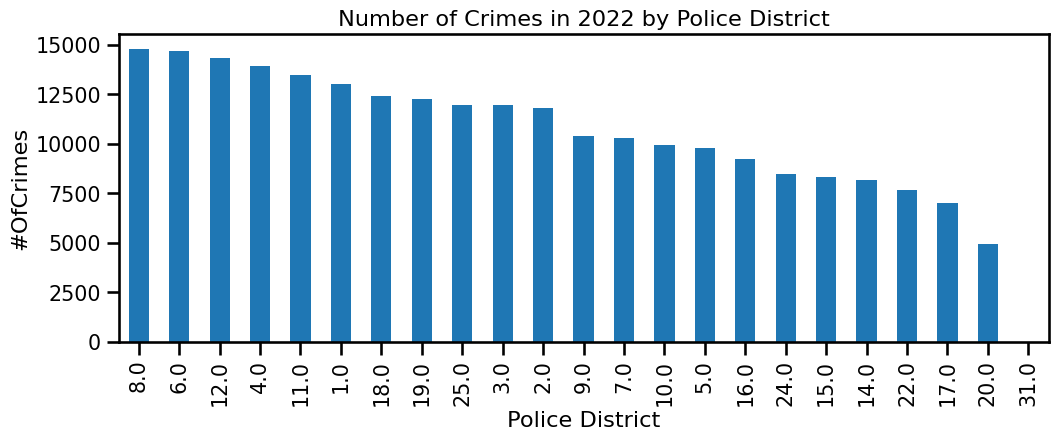

In [17]:
# plot the #OfCrimes
fig, ax = plt.subplots()
df_2022_grouped.plot(kind='bar', ax=ax);
ax.set_xlabel('Police District')
ax.set_ylabel('#OfCrimes')
ax.set_title('Number of Crimes in 2022 by Police District');

- Which district had the most crimes in 2022?
  - District 8.0
- Which had the least?
  - District 31.0

##Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
- **To answer these questions:**


In [18]:
#set the index
df_combined = df_combined.set_index(df_combined['Date'])

In [19]:
# resample to yearly and count the ID (number of crimes)
df_yearly = df_combined.resample('YE')['ID'].count()
df_yearly = df_yearly.rename('#OfCrimes')
display(df_yearly)

Date
2001-12-31    485886
2002-12-31    486807
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
2006-12-31    448179
2007-12-31    437087
2008-12-31    427183
2009-12-31    392827
2010-12-31    370513
2011-12-31    351993
2012-12-31    336319
2013-12-31    307536
2014-12-31    275789
2015-12-31    264787
2016-12-31    269823
2017-12-31    269100
2018-12-31    268899
2019-12-31    261325
2020-12-31    212194
2021-12-31    208824
2022-12-31    238858
Freq: YE-DEC, Name: #OfCrimes, dtype: int64

In [20]:
# sort by number of crimes
df_yearly_sorted = df_yearly.sort_values(ascending=False)
display(df_yearly_sorted)

Date
2002-12-31    486807
2001-12-31    485886
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
2006-12-31    448179
2007-12-31    437087
2008-12-31    427183
2009-12-31    392827
2010-12-31    370513
2011-12-31    351993
2012-12-31    336319
2013-12-31    307536
2014-12-31    275789
2016-12-31    269823
2017-12-31    269100
2018-12-31    268899
2015-12-31    264787
2019-12-31    261325
2022-12-31    238858
2020-12-31    212194
2021-12-31    208824
Name: #OfCrimes, dtype: int64

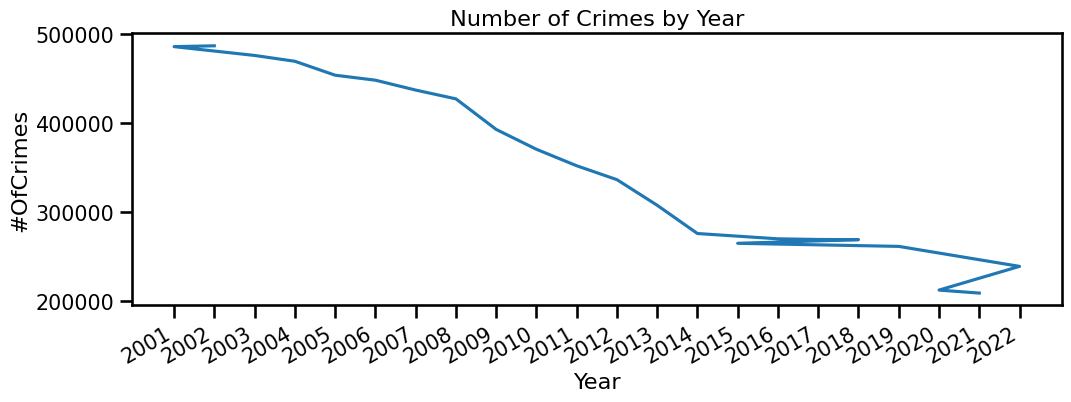

In [21]:
# visualize it
fig, ax = plt.subplots()
df_yearly_sorted.plot(ax=ax);
ax.set_xlabel('Year')
ax.set_ylabel('#OfCrimes')
ax.set_title('Number of Crimes by Year');

# Set the x-axis ticks to be the years from the index
ax.set_xticks(df_yearly_sorted.index)
ax.set_xticklabels(df_yearly_sorted.index.year) # Set the tick labels to be the year number


plt.show()

- Is the total number of crimes increasing or decreasing across the years?
  - In general , it is decreasing

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [22]:
df_combined['Primary Type'].value_counts()

Primary Type
THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING                              7185
CRIMINAL SEXUAL ASSAULT                 6353
STALKING                                4664
INTIMIDATION                            4595
CONCEALED CARRY LICENSE VIOLATION       1019
OBSCENITY                                810
PUBLIC INDECENCY                         193
NON-CRIMINAL                             181
OTHER NARCOTIC VIOLATION                 147
HUMAN TRAFFICKING                         96
NON - CRIMINAL                            38
RITUALISM                                 24
NON-CRIMINAL (SUBJECT SPECIFIED)           9
DOMESTIC VIOLENCE                          1
Name: count, dtype: int64

In [23]:
# Combine NON-CRIMINAL AND NON - CRIMINAL
df_combined['Primary Type'] = df_combined['Primary Type'].replace('NON - CRIMINAL', 'NON-CRIMINAL')

In [24]:
df_combined_Crime_type = df_combined.groupby('Primary Type').resample('YE').count()['ID']
df_combined_Crime_type = df_combined_Crime_type.sort_values(ascending=False)
display(df_combined_Crime_type)

Primary Type                       Date      
THEFT                              2001-12-31    99277
                                   2003-12-31    98876
                                   2002-12-31    98332
                                   2004-12-31    95463
BATTERY                            2002-12-31    94153
                                                 ...  
CONCEALED CARRY LICENSE VIOLATION  2002-12-31        0
HUMAN TRAFFICKING                  2011-12-31        0
NON-CRIMINAL (SUBJECT SPECIFIED)   2013-12-31        0
NON-CRIMINAL                       2011-12-31        0
RITUALISM                          2019-12-31        0
Name: ID, Length: 719, dtype: int64

In [25]:
df_combined_Crime_type = df_combined_Crime_type.unstack(level= 0)
display(df_combined_Crime_type)

Primary Type   ARSON  ASSAULT  BATTERY  BURGLARY  \
Date                                               
2001-12-31    1011.0  31384.0  93461.0   26014.0   
2002-12-31    1032.0  31523.0  94153.0   25623.0   
2003-12-31     955.0  29477.0  88380.0   25157.0   
2004-12-31     778.0  28850.0  87136.0   24564.0   
2005-12-31     691.0  27067.0  83964.0   25503.0   
2006-12-31     726.0  25945.0  80666.0   24324.0   
2007-12-31     712.0  26313.0  79593.0   24858.0   
2008-12-31     644.0  25448.0  75930.0   26218.0   
2009-12-31     616.0  22861.0  68460.0   26767.0   
2010-12-31     522.0  21537.0  65401.0   26422.0   
2011-12-31     504.0  20411.0  60459.0   26620.0   
2012-12-31     469.0  19900.0  59134.0   22845.0   
2013-12-31     364.0  17972.0  54006.0   17895.0   
2014-12-31     397.0  16903.0  49453.0   14569.0   
2015-12-31     453.0  17048.0  48923.0   13184.0   
2016-12-31     516.0  18742.0  50300.0   14289.0   
2017-12-31     444.0  19306.0  49239.0   13001.0   
2018-12-31     373.0  20406.0  49828.0   11747.0   
2019-12-31     376.0  20620.0  49517.0    9638.0   
2020-12-31     588.0  18252.0  41513.0    8757.0   
2021-12-31     529.0  20342.0  40462.0    6659.0   
2022-12-31     421.0  20796.0  40911.0    7592.0   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Date                                                                   
2001-12-31                                  1.0               1779.0   
2002-12-31                                  0.0               1807.0   
2003-12-31                                  0.0               1571.0   
2004-12-31                                  0.0               1538.0   
2005-12-31                                  0.0               1521.0   
2006-12-31                                  0.0               1439.0   
2007-12-31                                  0.0               1507.0   
2008-12-31                                  0.0               1515.0   
2009-12-31                                  0.0               1401.0   
2010-12-31                                  0.0               1335.0   
2011-12-31                                  0.0               1459.0   
2012-12-31                                  0.0               1392.0   
2013-12-31                                  0.0               1271.0   
2014-12-31                                 15.0               1312.0   
2015-12-31                                 34.0               1352.0   
2016-12-31                                 36.0               1497.0   
2017-12-31                                 69.0               1506.0   
2018-12-31                                149.0               1399.0   
2019-12-31                                217.0                908.0   
2020-12-31                                148.0                 75.0   
2021-12-31                                173.0                  NaN   
2022-12-31                                177.0                  NaN   

Primary Type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
Date                                                                        
2001-12-31            55859.0                     29.0            13241.0   
2002-12-31            55941.0                     27.0            13880.0   
2003-12-31            55011.0                     41.0            14807.0   
2004-12-31            53164.0                     42.0            15913.0   
2005-12-31            54548.0                     37.0            16655.0   
2006-12-31            57124.0                     47.0            14505.0   
2007-12-31            53749.0                     53.0            13699.0   
2008-12-31            52843.0                     47.0            12310.0   
2009-12-31            47725.0                     42.0            10851.0   
2010-12-31            40654.0                     56.0             9401.0   
2011-12-31            37331.0                     49.0             8659.0   
2012-12-31           

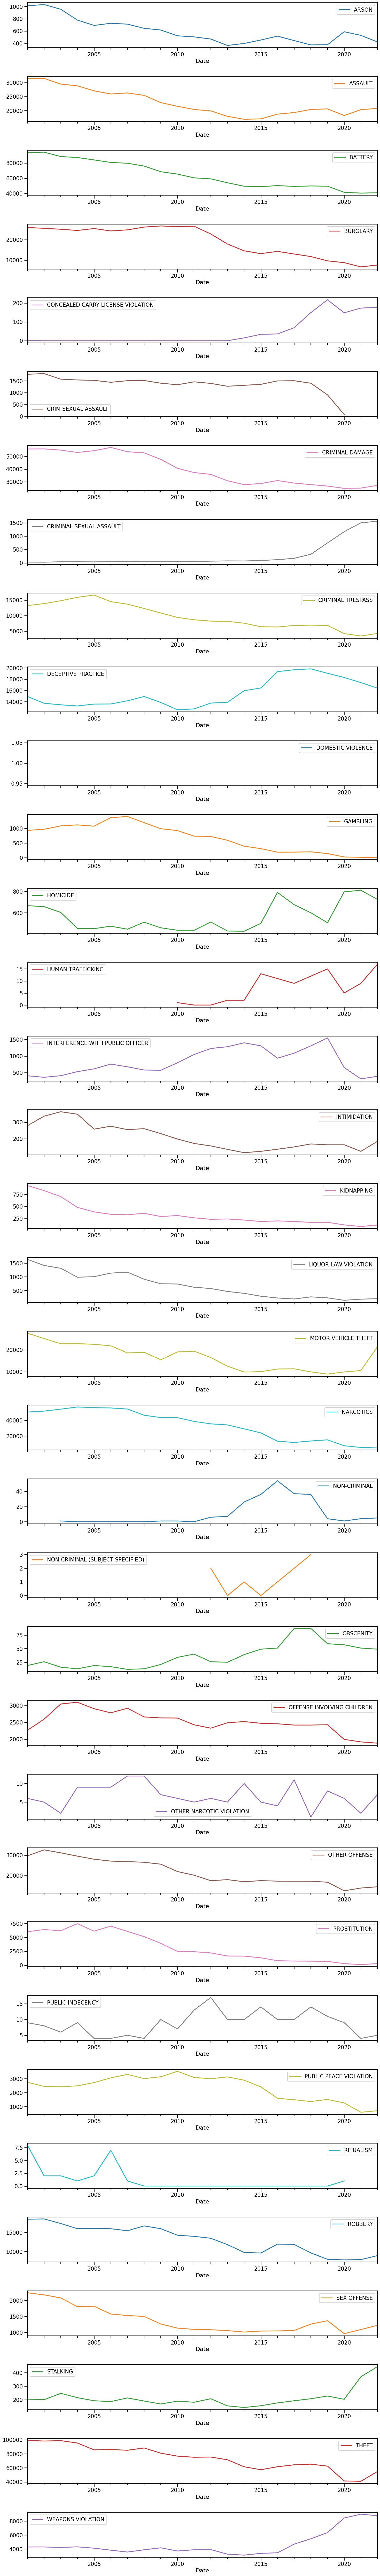

In [26]:
#visualize the result
fig, ax = plt.subplots(figsize=(15,100))
df_combined_Crime_type.plot(ax=ax,subplots= True);
ax.set_xlabel('Year')
ax.set_ylabel('#OfCrimes')
ax.set_title('How individual crimes types changes over years');
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout(h_pad=2) # Add vertical space between subplots
plt.show()

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
  - Based on the visualizations, the overall crime trend is decreasing. Looking at the individual crime type plots, some crimes appear to be increasing or staying relatively stable despite the overall decrease. For example:

    - Weapons Violation: Shows a general increasing trend, especially in recent years.
    - Criminal Sexual Assault: Shows an increase in recent years.
    - Stalking: Also appears to be increasing in recent years.
    - Concealed Carry License Violation: Shows a significant increase, but this crime type only appears in later years of the dataset.
    - HUMAN TRAFFICKING: This crime type has very low counts throughout the years, starting with a few instances around 2010 and showing a slight, but inconsistent, increase in more recent years. Due to the small numbers, it's difficult to discern a strong, consistent trend.
    - INTIMIDATION: The trend for Intimidation appears relatively stable with some fluctuations over the years, it doesn't show a clear increasing or decreasing pattern like the overall crime trend.
   - MOTOR VEHICLE THEFT: This crime type shows a significant decrease from the early 2000s until around 2019. However, there appears to be an increase in motor vehicle thefts in the last few years of the dataset (2020-2022), going against the overall decreasing trend of crime

In [27]:
# check DOMESTIC VOILENCE as it does`nt have a plot
df_combined_Crime_type['DOMESTIC VIOLENCE'].value_counts()

DOMESTIC VIOLENCE
1.0    1
Name: count, dtype: int64

- It seems this crime occurs just onece , let`s check in which year occurs?

In [28]:
pd.set_option('display.max_columns', 36)
df_combined_Crime_type[df_combined_Crime_type['DOMESTIC VIOLENCE']== 1.0]

Primary Type   ARSON  ASSAULT  BATTERY  BURGLARY  \
Date                                               
2001-12-31    1011.0  31384.0  93461.0   26014.0   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Date                                                                   
2001-12-31                                  1.0               1779.0   

Primary Type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
Date                                                                        
2001-12-31            55859.0                     29.0            13241.0   

Primary Type  DECEPTIVE PRACTICE  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  \
Date                                                                      
2001-12-31               14949.0                1.0     934.0     667.0   

Primary Type  HUMAN TRAFFICKING  INTERFERENCE WITH PUBLIC OFFICER  \
Date                                                                
2001-12-31                  NaN                             406.0   

Primary Type  INTIMIDATION  KIDNAPPING  LIQUOR LAW VIOLATION  \
Date                                                           
2001-12-31           279.0       933.0                1637.0   

Primary Type  MOTOR VEHICLE THEFT  NARCOTICS  NON-CRIMINAL  \
Date                                                         
2001-12-31                27553.0    50567.0           NaN   

Primary Type  NON-CRIMINAL (SUBJECT SPECIFIED)  OBSCENITY  \
Date                                                        
2001-12-31                                 NaN       19.0   

Primary Type  OFFENSE INVOLVING CHILDREN  OTHER NARCOTIC VIOLATION  \
Date                                                                 
2001-12-31                        2263.0                       6.0   

Primary Type  OTHER OFFENSE  PROSTITUTION  PUBLIC INDECENCY  \
Date                                                          
2001-12-31          29662.0        6026.0               9.0   

Primary Type  PUBLIC PEACE VIOLATION  RITUALISM  ROBBERY  SEX OFFENSE  \
Date                                                                    
2001-12-31                    2750.0        8.0  18441.0       2239.0   

Primary Type  STALKING    THEFT  WEAPONS VIOLATION  
Date                                                
2001-12-31       204.0  99277.0             4277.0

##Topic 3) Comparing AM vs. PM Rush Hour:

- consider any crime that occurred between 7 AM - 10 AM as AM rush hour
- consider any crime that occurred between 4 - 7 PM as PM rush hour.

- Answer the question: What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Answer the question: Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
- **To answer these questions:**

In [29]:
# get the hour from the date
df_combined['Hour'] = df_combined['Date'].dt.hour
df_combined['Hour'].value_counts()

Hour
12    442788
0     439921
19    434698
20    433216
18    421540
21    420474
22    413785
15    410154
17    395803
16    389010
14    388946
13    366287
23    343961
11    342088
9     333576
10    326996
8     260993
1     244531
2     206136
7     176082
3     166702
4     126578
6     123314
5     105530
Name: count, dtype: int64

- Hour from 0 - 23 .
- Consider from 7 - 10 as AM
- Consider from 16 - 19 as PM

In [30]:
df_combined['Rush Hour'] = np.where((df_combined['Hour'] >= 7) & (df_combined['Hour'] <= 10), 'AM',
                                    np.where((df_combined['Hour'] >= 16) & (df_combined['Hour'] <= 19), 'PM', 'Other'))
df_combined['Rush Hour'].value_counts()

Rush Hour
Other    4974411
PM       1641051
AM       1097647
Name: count, dtype: int64

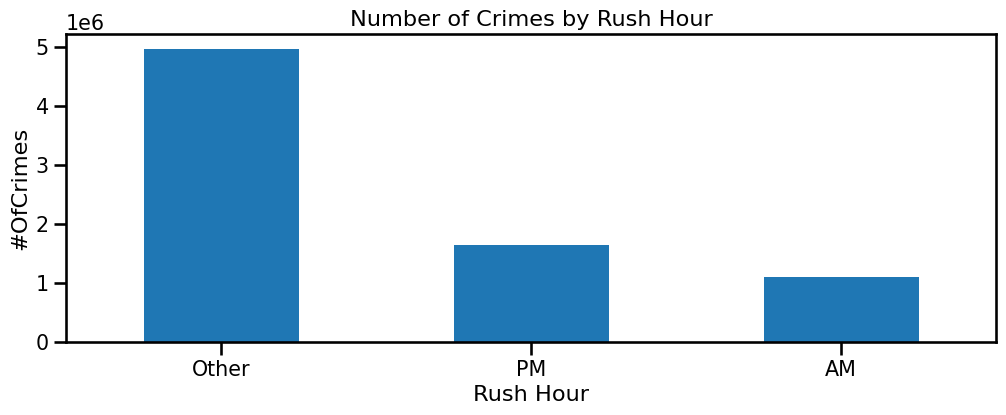

In [31]:
# visualize it
fig, ax = plt.subplots()
df_combined['Rush Hour'].value_counts().plot(kind='bar', ax=ax,rot=0);
ax.set_xlabel('Rush Hour')
ax.set_ylabel('#OfCrimes')
ax.set_title('Number of Crimes by Rush Hour');

- Are crimes more common during AM rush hour or PM rush hour?
    - During PM rush hour.

In [32]:
#First  group by the primary type
df_combined_primary_type = df_combined.groupby(['Primary Type','Rush Hour']).resample('YE').size()
df_combined_primary_type = df_combined_primary_type.rename('#OfCrimes')
display(df_combined_primary_type)

Primary Type       Rush Hour  Date      
ARSON              AM         2001-12-31      86
                              2002-12-31     112
                              2003-12-31      99
                              2004-12-31      72
                              2005-12-31      51
                                            ... 
WEAPONS VIOLATION  PM         2018-12-31    1216
                              2019-12-31    1240
                              2020-12-31    1650
                              2021-12-31    1672
                              2022-12-31    1865
Name: #OfCrimes, Length: 2052, dtype: int64

In [33]:
# sort #ofCrimes just for AM
df_combined_primary_type_AM_sorted = df_combined_primary_type.xs('AM', level='Rush Hour').sort_values(ascending=False)
df_combined_primary_type_AM_sorted

Primary Type              Date      
THEFT                     2003-12-31    16250
                          2002-12-31    16216
                          2001-12-31    15949
                          2004-12-31    15607
                          2008-12-31    14699
                                        ...  
OTHER NARCOTIC VIOLATION  2013-12-31        0
                          2011-12-31        0
PUBLIC INDECENCY          2003-12-31        0
                          2008-12-31        0
OTHER NARCOTIC VIOLATION  2017-12-31        0
Name: #OfCrimes, Length: 659, dtype: int64

In [34]:
# Get the top 5 distinct primary types from the sorted index
top_5_am_primary_types = df_combined_primary_type_AM_sorted.index.get_level_values('Primary Type').unique()[:5]
display(top_5_am_primary_types)

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'BURGLARY', 'OTHER OFFENSE'], dtype='object', name='Primary Type')

In [35]:
#visualize only the 5 top crimes during AM
df_combined_primary_type_AM_sorted = df_combined_primary_type_AM_sorted.loc[top_5_am_primary_types]
display(df_combined_primary_type_AM_sorted)
df_combined_primary_type_AM_sorted = df_combined_primary_type_AM_sorted.unstack(level= 0)
display(df_combined_primary_type_AM_sorted)

Primary Type   Date      
THEFT          2003-12-31    16250
               2002-12-31    16216
               2001-12-31    15949
               2004-12-31    15607
               2008-12-31    14699
                             ...  
OTHER OFFENSE  2017-12-31     3322
               2019-12-31     3275
               2021-12-31     2688
               2022-12-31     2614
               2020-12-31     2303
Name: #OfCrimes, Length: 110, dtype: int64

Primary Type  THEFT  BATTERY  CRIMINAL DAMAGE  BURGLARY  OTHER OFFENSE
Date                                                                  
2001-12-31    15949     9271             6264      5475           5488
2002-12-31    16216     9535             6305      5574           6142
2003-12-31    16250     9300             6017      5410           5367
2004-12-31    15607     9375             6136      5618           5027
2005-12-31    14159     8948             6714      5752           4790
2006-12-31    14604     8808             7221      5238           4887
2007-12-31    14611     8295             6711      5566           4650
2008-12-31    14699     8080             6382      6282           4895
2009-12-31    13181     7553             5721      6510           4868
2010-12-31    12645     7226             4970      6821           4485
2011-12-31    12538     6731             4946      7086           4065
2012-12-31    13267     6456             4675      5951           3545
2013-12-31    12189     6412             3993      4674           3745
2014-12-31     9402     5759             3690      3684           3475
2015-12-31     8435     5854             3821      3069           3407
2016-12-31     8945     6289             4098      3192           3430
2017-12-31     9249     6311             3827      2885           3322
2018-12-31     9474     6432             3852      2439           3402
2019-12-31     8965     6235             3633      1912           3275
2020-12-31     6189     5040             3065      1090           2303
2021-12-31     6005     5165             3368       874           2688
2022-12-31     8180     5400             3680      1117           2614

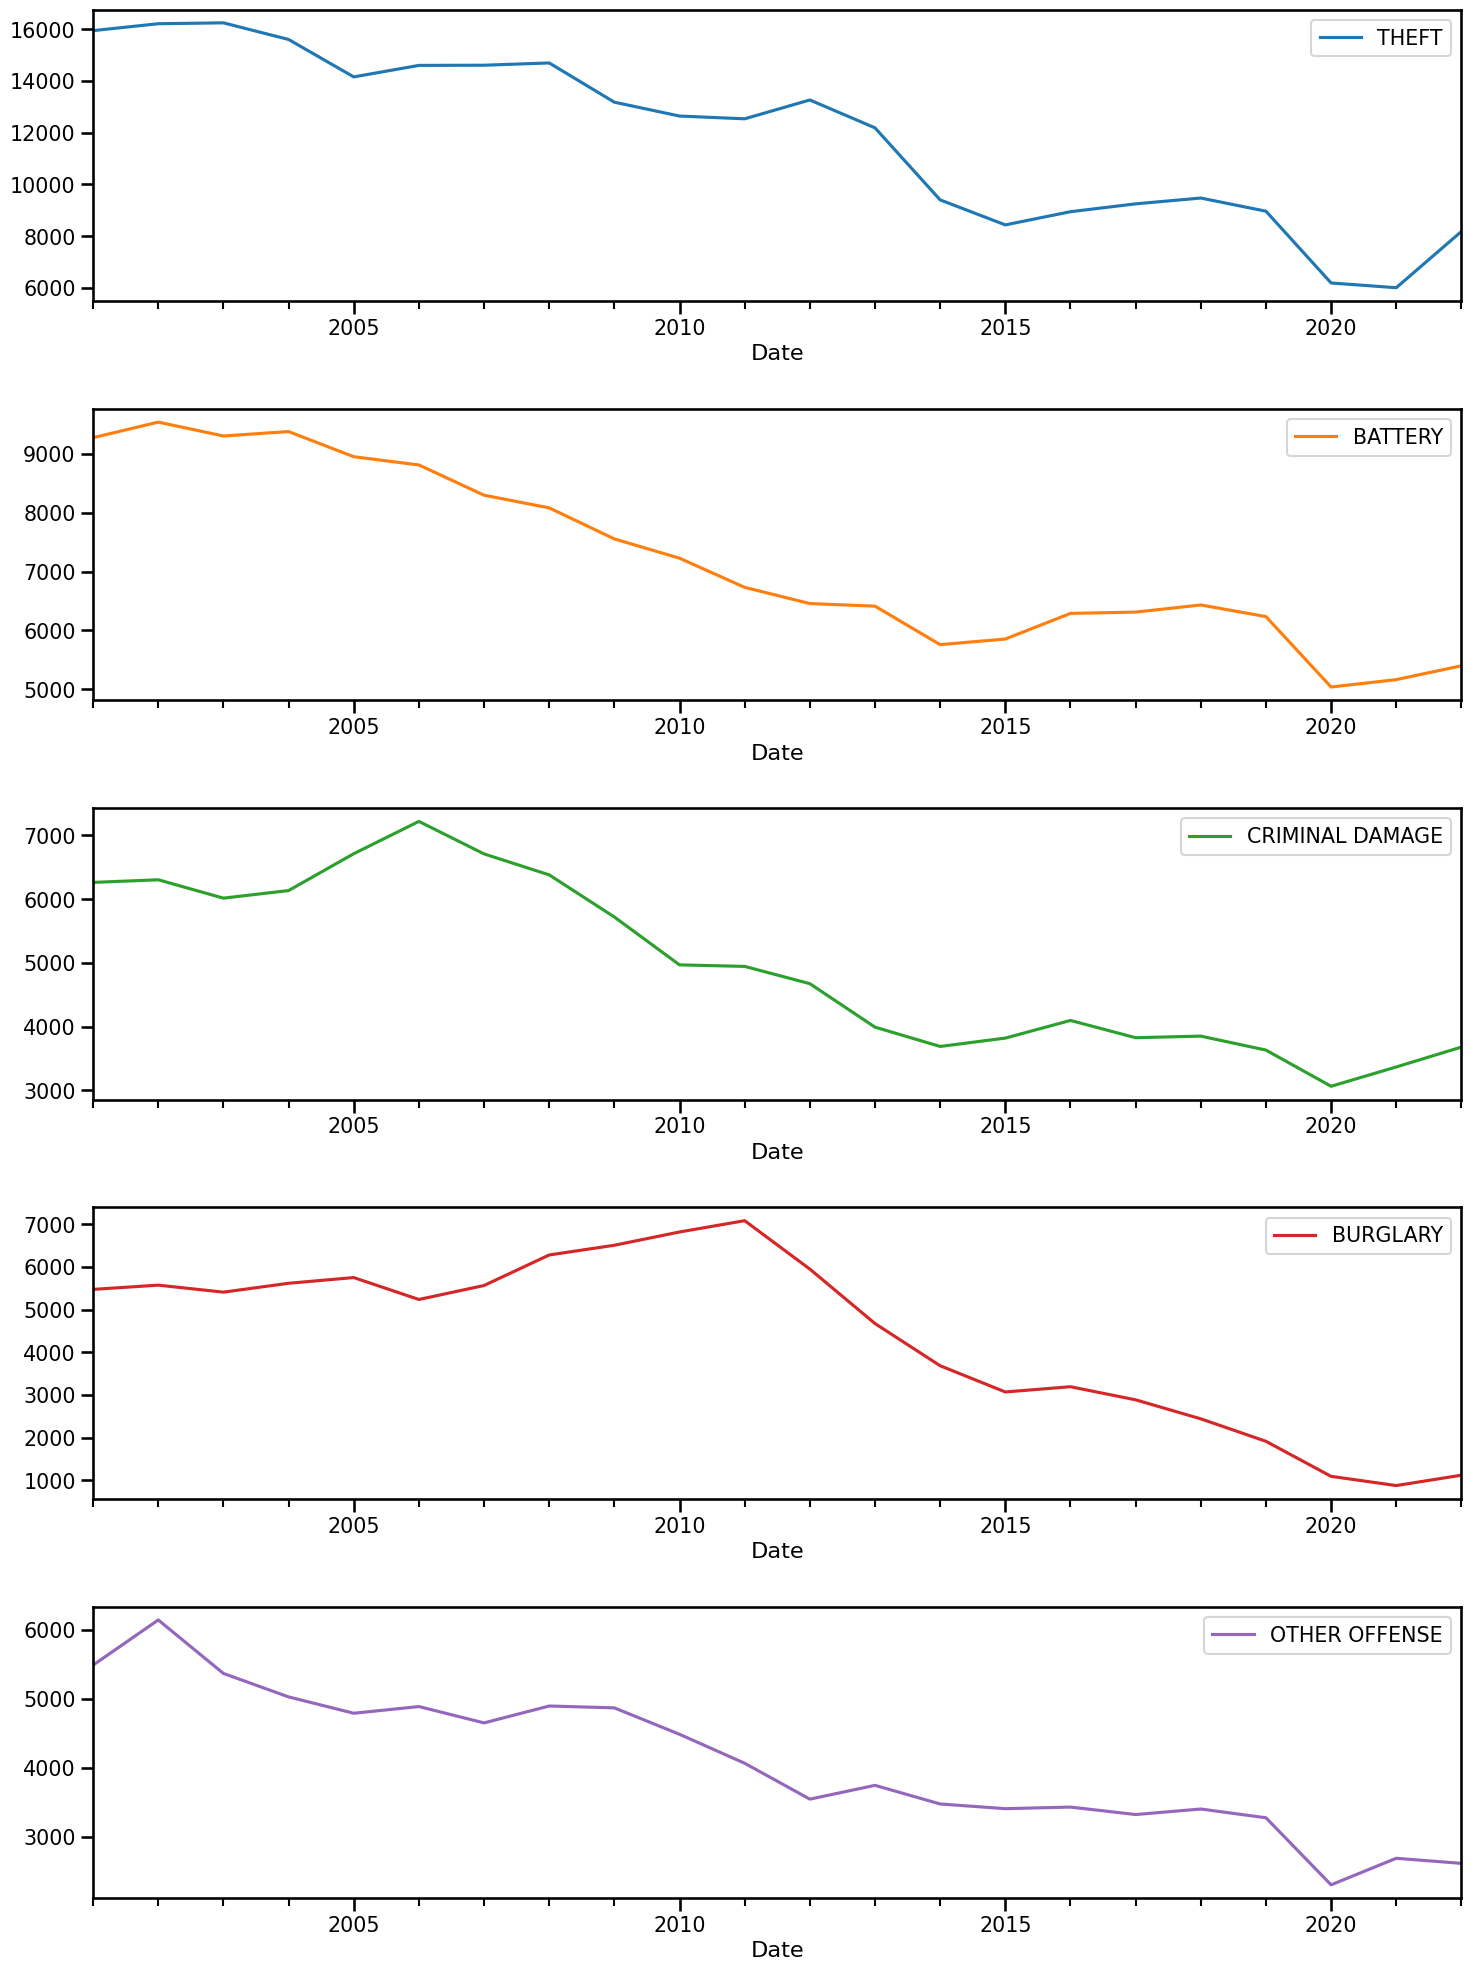

In [36]:
# visualize only the 5 top common crimes during AM
fig, ax = plt.subplots(figsize=(15,20))
df_combined_primary_type_AM_sorted.plot(ax=ax,subplots= True);
fig.tight_layout(h_pad=2) # Add vertical space between subplots
ax.set_xlabel('Year')
ax.set_ylabel('#OfCrimes')
ax.set_title('5 top common crimes types during AM');

In [37]:
# sort #ofCrimes just for AM
df_combined_primary_type_PM_sorted = df_combined_primary_type.xs('PM', level='Rush Hour').sort_values(ascending=False)
df_combined_primary_type_PM_sorted

Primary Type                      Date      
THEFT                             2001-12-31    23668
                                  2003-12-31    22664
                                  2002-12-31    22411
                                  2004-12-31    21620
BATTERY                           2001-12-31    19891
                                                ...  
NON-CRIMINAL (SUBJECT SPECIFIED)  2015-12-31        0
OTHER NARCOTIC VIOLATION          2021-12-31        0
HUMAN TRAFFICKING                 2018-12-31        0
NON-CRIMINAL (SUBJECT SPECIFIED)  2013-12-31        0
RITUALISM                         2004-12-31        0
Name: #OfCrimes, Length: 674, dtype: int64

In [38]:
# Get the top 5 distinct primary types from the sorted index
top_5_pm_primary_types = df_combined_primary_type_PM_sorted.index.get_level_values('Primary Type').unique()[:5]
display(top_5_pm_primary_types)

Index(['THEFT', 'BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'ASSAULT'], dtype='object', name='Primary Type')

In [39]:
#visualize only the 5 top crimes during AM
df_combined_primary_type_PM_sorted = df_combined_primary_type_PM_sorted.loc[top_5_pm_primary_types]
display(df_combined_primary_type_PM_sorted)
df_combined_primary_type_PM_sorted = df_combined_primary_type_PM_sorted.unstack(level= 0)
display(df_combined_primary_type_PM_sorted)

Primary Type  Date      
THEFT         2001-12-31    23668
              2003-12-31    22664
              2002-12-31    22411
              2004-12-31    21620
              2008-12-31    19717
                            ...  
ASSAULT       2017-12-31     4502
              2020-12-31     4276
              2013-12-31     4172
              2015-12-31     4110
              2014-12-31     3998
Name: #OfCrimes, Length: 110, dtype: int64

Primary Type  THEFT  BATTERY  NARCOTICS  CRIMINAL DAMAGE  ASSAULT
Date                                                             
2001-12-31    23668    19891      11558            12265     7732
2002-12-31    22411    19392      11436            12056     7631
2003-12-31    22664    18366      12883            11660     7014
2004-12-31    21620    17735      11456            11072     6550
2005-12-31    18947    17070      11197            11223     6070
2006-12-31    19274    16415      10620            12152     6077
2007-12-31    18459    15835      10773            11246     6185
2008-12-31    19717    15479       9756            10850     5999
2009-12-31    18441    14096       9628             9745     5329
2010-12-31    17675    13327       9306             8383     5148
2011-12-31    17214    12229       8471             7803     4929
2012-12-31    17043    12012       7949             7271     4766
2013-12-31    16331    10908       7845             6367     4172
2014-12-31    15049     9989       7602             5763     3998
2015-12-31    14240    10140       6399             6004     4110
2016-12-31    15267    10162       3696             6615     4552
2017-12-31    16467    10186       3126             6331     4502
2018-12-31    16453     9874       3574             5783     4818
2019-12-31    15804    10203       4028             5705     4883
2020-12-31     9867     8582       1702             4932     4276
2021-12-31     9728     8052        775             4796     4631
2022-12-31    12783     8060        974             5401     4807

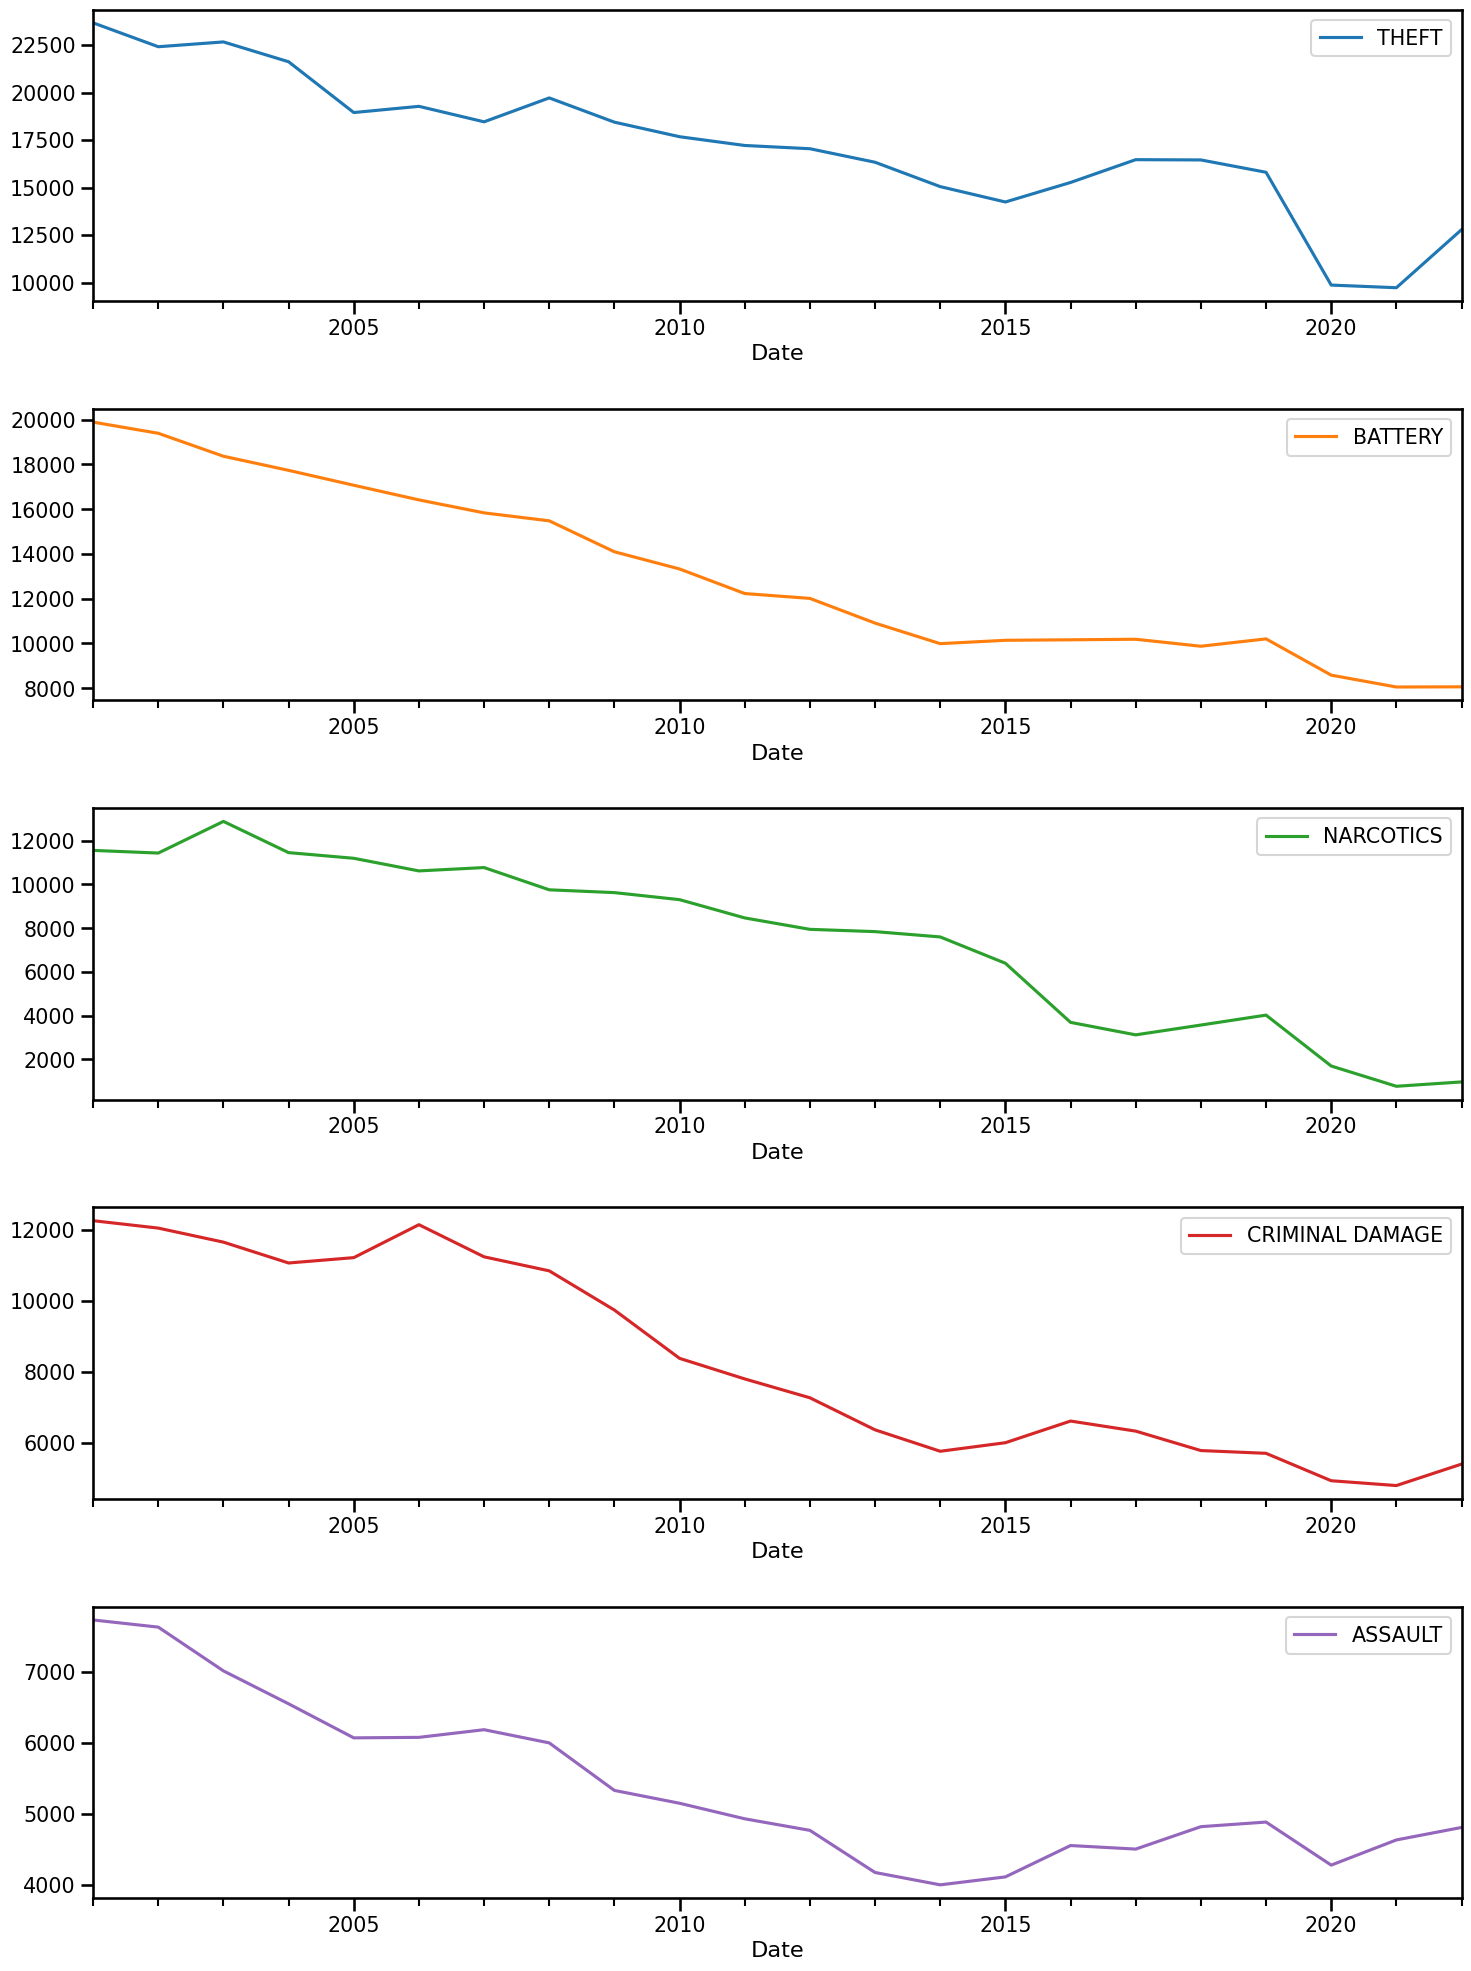

In [40]:
# visualize only the 5 top common crimes during PM
fig, ax = plt.subplots(figsize=(15,20))
df_combined_primary_type_PM_sorted.plot(ax=ax,subplots= True);
fig.tight_layout(h_pad=2) # Add vertical space between subplots
ax.set_xlabel('Year')
ax.set_ylabel('#OfCrimes')
ax.set_title('5 top common crimes types during PM');

 - **What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?**
   - During AM : ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'BURGLARY', 'OTHER OFFENSE'].
   - During PM : ['THEFT', 'BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'ASSAULT'].


- **Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?**
 - During All years , it was more common during PM.

In [41]:
# Filter the original DataFrame for 'MOTOR VEHICLE THEFT' and AM/PM rush hours
motor_vehicle_theft_rush_hour_df = df_combined[(df_combined['Primary Type'] == 'MOTOR VEHICLE THEFT') & (df_combined['Rush Hour'].isin(['AM', 'PM']))]
motor_vehicle_theft_rush_hour_df

ID                Date         Primary Type  \
Date                                                                     
2001-01-01 16:00:00   1312461 2001-01-01 16:00:00  MOTOR VEHICLE THEFT   
2001-01-01 16:00:00   1321113 2001-01-01 16:00:00  MOTOR VEHICLE THEFT   
2001-01-01 16:00:00   1310843 2001-01-01 16:00:00  MOTOR VEHICLE THEFT   
2001-01-01 17:00:00   1310988 2001-01-01 17:00:00  MOTOR VEHICLE THEFT   
2001-01-01 17:00:00   1311147 2001-01-01 17:00:00  MOTOR VEHICLE THEFT   
...                       ...                 ...                  ...   
2022-12-31 09:00:00  12937832 2022-12-31 09:00:00  MOTOR VEHICLE THEFT   
2022-12-31 09:40:00  12937628 2022-12-31 09:40:00  MOTOR VEHICLE THEFT   
2022-12-31 10:00:00  12937775 2022-12-31 10:00:00  MOTOR VEHICLE THEFT   
2022-12-31 10:30:00  12937755 2022-12-31 10:30:00  MOTOR VEHICLE THEFT   
2022-12-31 10:30:00  12938114 2022-12-31 10:30:00  MOTOR VEHICLE THEFT   

                                         Description Location Description  \
Date                                                                        
2001-01-01 16:00:00                       AUTOMOBILE               STREET   
2001-01-01 16:00:00  THEFT/RECOVERY: TRUCK,BUS,MHOME               STREET   
2001-01-01 16:00:00                       AUTOMOBILE                ALLEY   
2001-01-01 17:00:00                       AUTOMOBILE               STREET   
2001-01-01 17:00:00                       AUTOMOBILE               STREET   
...                                              ...                  ...   
2022-12-31 09:00:00                       AUTOMOBILE               STREET   
2022-12-31 09:40:00             ATTEMPT - AUTOMOBILE               STREET   
2022-12-31 10:00:00                       AUTOMOBILE               STREET   
2022-12-31 10:30:00                       AUTOMOBILE               STREET   
2022-12-31 10:30:00                       AUTOMOBILE               STREET   

                     Arrest  Domestic  Beat  District  Ward   Latitude  \
Date                                                                     
2001-01-01 16:00:00    True     False  1413      14.0   NaN  41.926243   
2001-01-01 16:00:00   False     False   813       8.0   NaN  41.778417   
2001-01-01 16:00:00   False     False  1422      14.0   NaN  41.912981   
2001-01-01 17:00:00   False     False   831       8.0  15.0  41.775451   
2001-01-01 17:00:00   False     False  1324      12.0   NaN  41.891288   
...                     ...       ...   ...       ...   ...        ...   
2022-12-31 09:00:00   False     False   825       8.0  16.0  41.778381   
2022-12-31 09:40:00   False     False   832       8.0  16.0  41.773323   
2022-12-31 10:00:00   False     False   421       4.0   7.0  41.755398   
2022-12-31 10:30:00   False     False  2513      25.0  29.0  41.912007   
2022-12-31 10:30:00   False     False   923       9.0  14.0  41.798328   

                     Longitude  Hour Rush Hour  
Date                                            
2001-01-01 16:00:00 -87.710661    16        PM  
2001-01-01 16:00:00 -87.748594    16        PM  
2001-01-01 16:00:00 -87.711929    16        PM  
2001-01-01 17:00:00 -87.690719    17        PM  
2001-01-01 17:00:00 -87.671078    17        PM  
...                        ...   ...       ...  
2022-12-31 09:00:00 -87.686063     9        AM  
2022-12-31 09:40:00 -87.684702     9        AM  
2022-12-31 10:00:00 -87.563400    10        AM  
2022-12-31 10:30:00 -87.776529    10        AM  
2022-12-31 10:30:00 -87.687824    10        AM  

[128713 rows x 14 columns]

In [42]:
# Set the Date as index for resampling
motor_vehicle_theft_rush_hour_df = motor_vehicle_theft_rush_hour_df.set_index('Date')

In [43]:
# Group by 'Rush Hour' and resample by year, then count the crimes
motor_vehicle_theft_rush_hour_yearly = motor_vehicle_theft_rush_hour_df.groupby('Rush Hour').resample('YE')['ID'].count()

In [44]:
# Unstack the result to have years as index and rush hour categories as columns
motor_vehicle_theft_rush_hour_yearly = motor_vehicle_theft_rush_hour_yearly.unstack(level=0)

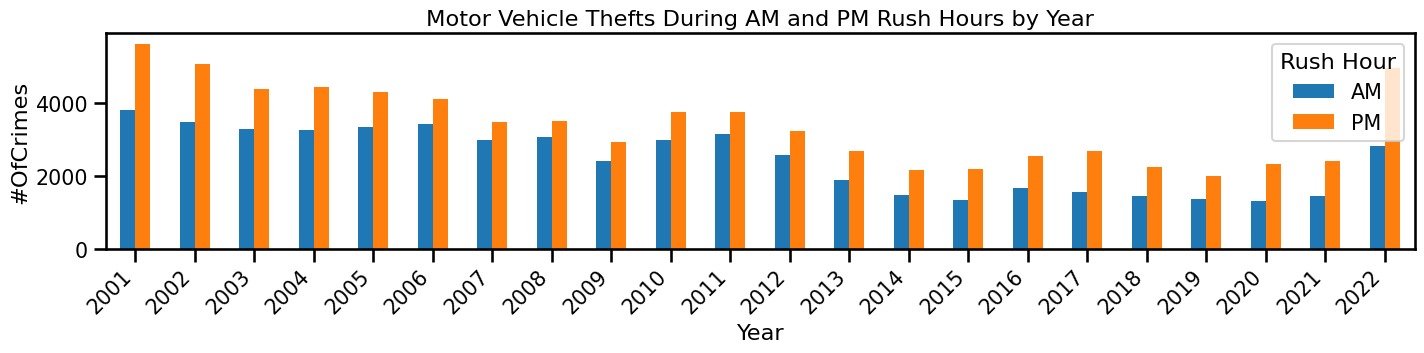

In [45]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 5))
motor_vehicle_theft_rush_hour_yearly.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('#OfCrimes')
ax.set_title('Motor Vehicle Thefts During AM and PM Rush Hours by Year')
ax.legend(title='Rush Hour')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Set the x-axis tick labels to be the years from the index
ax.set_xticklabels(motor_vehicle_theft_rush_hour_yearly.index.year)

plt.show()

-  Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
     - PM Rush hour

## Topic 4) Comparing Months:

- Answer the question: What months have the most crime? What months have the least?
- Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?
- **To answer these questions:**

In [46]:
# group by the primary type and resample the original dataset to monthy
df_combined_monthly = df_combined.resample('MS').size()
df_combined_monthly = df_combined_monthly.rename('#OfCrimes')
display(df_combined_monthly)

Date
2001-01-01    38119
2001-02-01    33787
2001-03-01    40566
2001-04-01    40091
2001-05-01    41839
              ...  
2022-08-01    22293
2022-09-01    22318
2022-10-01    23195
2022-11-01    20776
2022-12-01    19875
Freq: MS, Name: #OfCrimes, Length: 264, dtype: int64

In [47]:
#sort the #ofcrimes
df_combined_monthly_sorted = df_combined_monthly.sort_values(ascending=False)
display(df_combined_monthly_sorted)

Date
2002-07-01    46013
2001-07-01    44702
2003-08-01    44270
2002-08-01    44216
2001-08-01    44040
              ...  
2021-04-01    15601
2022-01-01    15599
2022-02-01    15234
2021-02-01    13100
2020-04-01    12923
Name: #OfCrimes, Length: 264, dtype: int64

In [48]:
# Get the last 5 months with the least crimes
df_combined_monthly_sorted.tail(5)

Date
2021-04-01    15601
2022-01-01    15599
2022-02-01    15234
2021-02-01    13100
2020-04-01    12923
Name: #OfCrimes, dtype: int64

- The five top months that have the most crimes:
   - 2002-07 , 2001-07 , 2003-08 , 2002-08 , 2001-08
- The five months that have the least crimes:
  - 2021-04 , 2022-01 , 2022-02 , 2021-02 , 2020-04

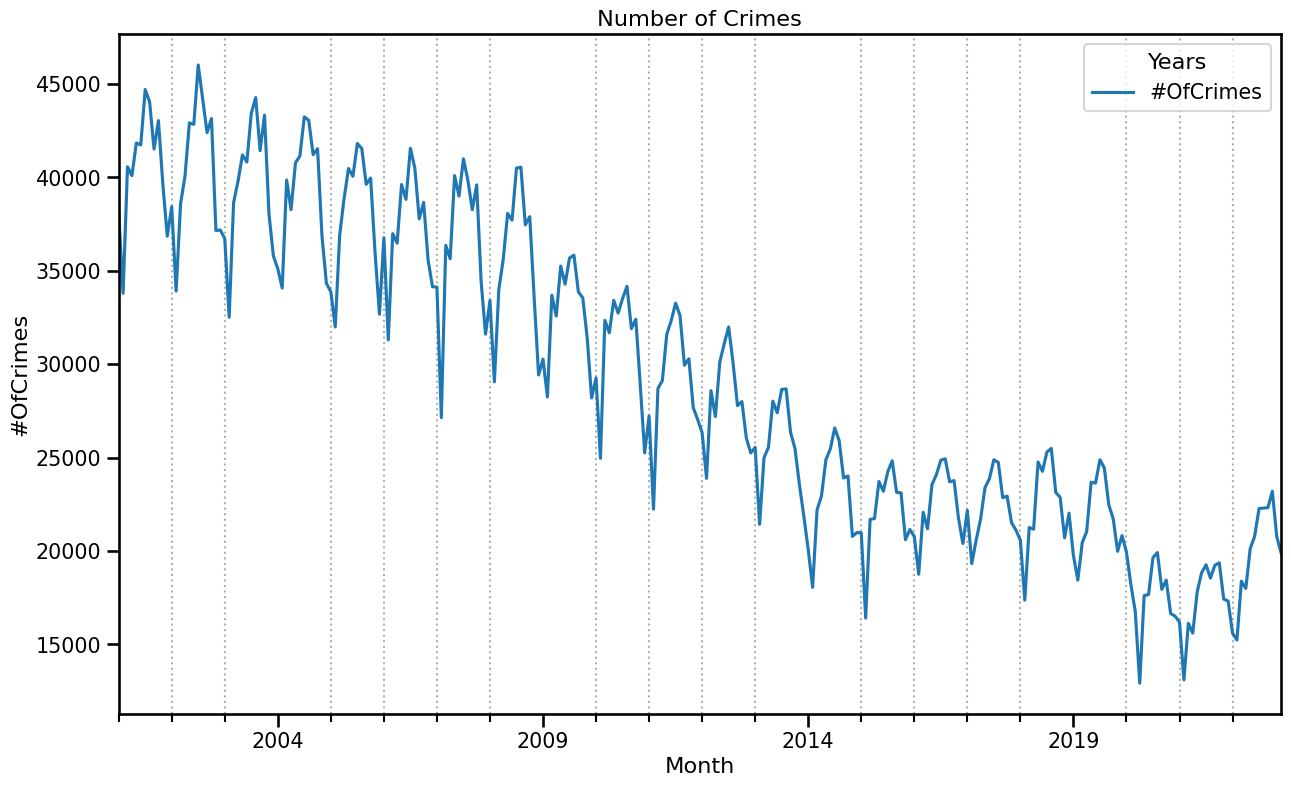

In [49]:
# visualize
fig, ax = plt.subplots(figsize=(15,10))
major_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(major_locator)
major_formatter = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(major_formatter)
fig.autofmt_xdate(which='major', rotation=90, ha='center')
minor_locator = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_locator)
minor_formatter = mdates.DateFormatter("")
ax.xaxis.set_minor_formatter(minor_formatter)
ax.grid(which='minor', axis='x', ls=":")
ax.grid(which='major', axis='x', color='k')

df_combined_monthly.plot(ax=ax);

ax.set_xlabel('Month')
ax.set_ylabel('#OfCrimes')
ax.set_title('Number of Crimes');
ax.legend(title='Years')

plt.show()

In [50]:
df_combined

ID                Date        Primary Type  \
Date                                                                    
2001-01-01 01:00:00   1326041 2001-01-01 01:00:00             BATTERY   
2001-01-01 13:00:00   1319931 2001-01-01 13:00:00             BATTERY   
2001-01-01 13:00:00   1324743 2001-01-01 13:00:00            GAMBLING   
2001-01-01 01:00:00   1310717 2001-01-01 01:00:00     CRIMINAL DAMAGE   
2001-01-01 01:00:00   1318099 2001-01-01 01:00:00             BATTERY   
...                       ...                 ...                 ...   
2022-12-31 12:50:00  12938029 2022-12-31 12:50:00             ASSAULT   
2022-12-31 12:50:00  12937822 2022-12-31 12:50:00             ASSAULT   
2022-12-31 00:52:00  12937583 2022-12-31 00:52:00             BATTERY   
2022-12-31 12:52:00  12938420 2022-12-31 12:52:00             ASSAULT   
2022-12-31 12:59:00  12939906 2022-12-31 12:59:00  DECEPTIVE PRACTICE   

                                                 Description  \
Date                                                           
2001-01-01 01:00:00                                   SIMPLE   
2001-01-01 13:00:00                                   SIMPLE   
2001-01-01 13:00:00                      ILLEGAL ILL LOTTERY   
2001-01-01 01:00:00                               TO VEHICLE   
2001-01-01 01:00:00                                   SIMPLE   
...                                                      ...   
2022-12-31 12:50:00                                   SIMPLE   
2022-12-31 12:50:00                     AGGRAVATED - HANDGUN   
2022-12-31 00:52:00                                   SIMPLE   
2022-12-31 12:52:00                                   SIMPLE   
2022-12-31 12:59:00  FINANCIAL IDENTITY THEFT $300 AND UNDER   

                             Location Description  Arrest  Domestic  Beat  \
Date                                                                        
2001-01-01 01:00:00                     RESIDENCE   False     False  1624   
2001-01-01 13:00:00                     RESIDENCE   False      True   825   
2001-01-01 13:00:00                        STREET    True     False   313   
2001-01-01 01:00:00                        STREET   False     False  2424   
2001-01-01 01:00:00       RESIDENCE PORCH/HALLWAY   False      True   214   
...                                           ...     ...       ...   ...   
2022-12-31 12:50:00                     APARTMENT   False     False  1014   
2022-12-31 12:50:00                     APARTMENT   False      True   733   
2022-12-31 00:52:00                    BARBERSHOP   False     False  1135   
2022-12-31 12:52:00  COMMERCIAL / BUSINESS OFFICE   False     False  1432   
2022-12-31 12:59:00                     RESIDENCE   False     False  1511   

                     District  Ward   Latitude  Longitude  Hour Rush Hour  
Date                                                                       
2001-01-01 01:00:00      16.0   NaN  41.957850 -87.749185     1     Other  
2001-01-01 13:00:00       8.0   NaN  41.783892 -87.684841    13     Other  
2001-01-01 13:00:00       3.0   NaN  41.780412 -87.611970    13     Other  
2001-01-01 01:00:00      24.0   NaN  42.012391 -87.678032     1     Other  
2001-01-01 01:00:00       2.0   NaN  41.819538 -87.620020     1     Other  
...                       ...   ...        ...        ...   ...       ...  
2022-12-31 12:50:00      10.0  24.0  41.855911 -87.719966    12     Other  
2022-12-31 12:50:00       7.0   6.0  41.766546 -87.645669    12     Other  
2022-12-31 00:52:00      11.0  28.0  41.868829 -87.686098     0     Other  
2022-12-31 12:52:00      14.0  32.0  41.930693 -87.685657    12     Other  
2022-12-31 12:59:00      15.0  29.0        NaN        NaN    12     Other  

[7713109 rows x 14 columns]

In [51]:
df_combined_monthly_with_primary_type = df_combined.groupby(['Primary Type']).resample('MS').size()
df_combined_monthly_with_primary_type = df_combined_monthly_with_primary_type.rename('#OfCrimes')
display(df_combined_monthly_with_primary_type)

Primary Type       Date      
ARSON              2001-01-01     67
                   2001-02-01     57
                   2001-03-01     93
                   2001-04-01     89
                   2001-05-01     94
                                ... 
WEAPONS VIOLATION  2022-08-01    832
                   2022-09-01    780
                   2022-10-01    735
                   2022-11-01    597
                   2022-12-01    543
Name: #OfCrimes, Length: 8571, dtype: int64

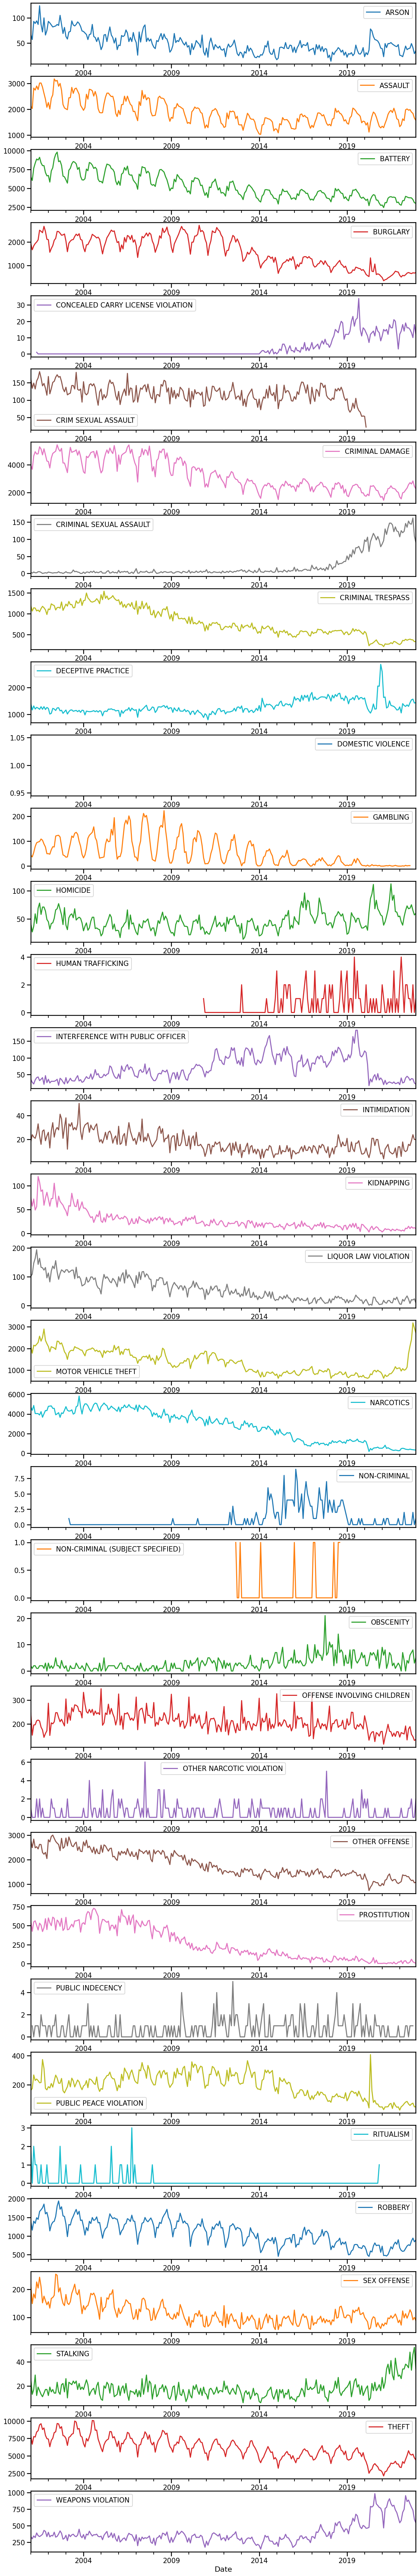

In [52]:
# plot each primary type in a plot
fig, ax = plt.subplots(figsize=(15,100))
df_combined_monthly_with_primary_type.unstack(level=0).plot(ax=ax,subplots= True);

- Are there any individual crimes that do not follow this pattern? If so, which crimes?
  - In general ,these crimes started to increase after 2020 to 2022 when all total crimes decreased:
   - Weapons violation , Human trafficking , Deceptive practice , Criminal sexual assault , Concealed curry license violation , Homicide, Motor vehicle theft , Stalking.

## Topic 5) Comparing Holidays:

-  Answer the question: What are the top 3 holidays with the largest number of crimes?
- Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [53]:
# import holidays
import holidays
from holidays import country_holidays

In [54]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [55]:
df_combined.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 00:42:00',
               '2022-12-31 00:44:00', '2022-12-31 00:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 00:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [56]:
df_combined['Holidays'] = [us_holidays.get(date) for date in df_combined.index]

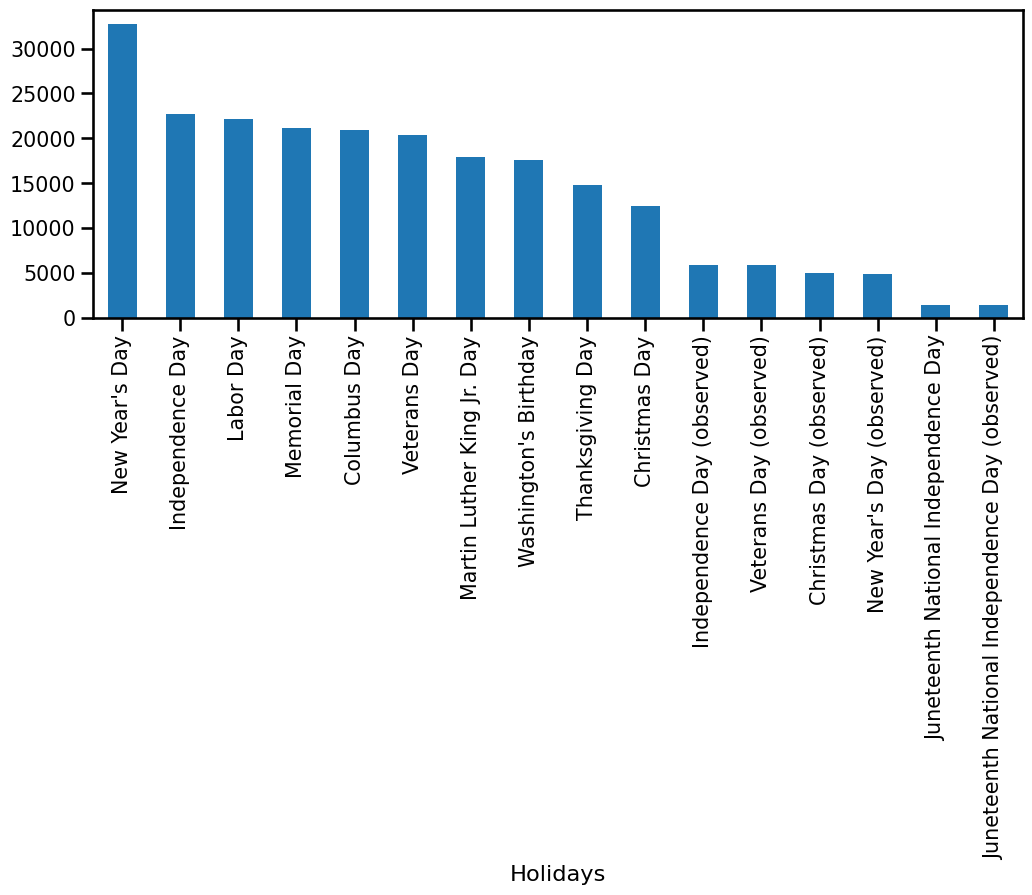

In [57]:
df_combined['Holidays'].value_counts().plot(kind='bar');

- What are the top 3 holidays with the largest number of crimes?
   - New Year's Day
   - Independence Day
   - Labor Day

In [58]:
df_combined_holidays = df_combined.groupby(['Holidays','Primary Type']).resample('YE').size()
df_combined_holidays = df_combined_holidays.rename('#OfCrimes')
display(df_combined_holidays)

Holidays               Primary Type       Date      
Christmas Day          ARSON              2001-12-31     6
                                          2002-12-31     1
                                          2003-12-31     3
                                          2004-12-31     1
                                          2005-12-31     0
                                                        ..
Washington's Birthday  WEAPONS VIOLATION  2018-12-31     7
                                          2019-12-31    17
                                          2020-12-31    16
                                          2021-12-31     6
                                          2022-12-31    21
Name: #OfCrimes, Length: 7145, dtype: int64

In [59]:
# For New year day: Group by Primary Type for New Year's Day and sum the counts across all years
top_5_new_year = df_combined_holidays.loc[pd.IndexSlice['New Year\'s Day', :]].groupby('Primary Type').sum().sort_values(ascending=False).head(5)

# Display the top 5 unique primary types for New Year's Day
display(top_5_new_year)

Primary Type
THEFT                         6845
BATTERY                       6043
CRIMINAL DAMAGE               3236
DECEPTIVE PRACTICE            2934
OFFENSE INVOLVING CHILDREN    2380
Name: #OfCrimes, dtype: int64

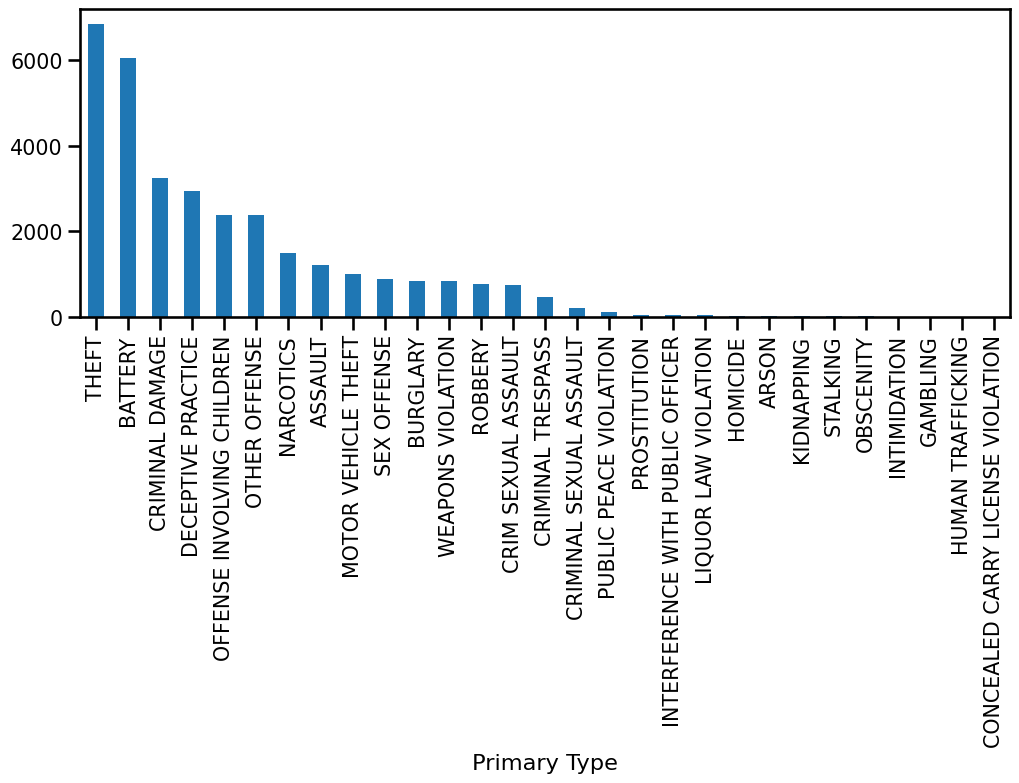

In [60]:
df_combined_holidays.loc[pd.IndexSlice['New Year\'s Day', :]].groupby('Primary Type').sum().sort_values(ascending=False).plot(kind='bar');

In [61]:
top_5_Independance_day = df_combined_holidays.loc[pd.IndexSlice['Independence Day', :]].groupby('Primary Type').sum().sort_values(ascending=False).head(5)
display(top_5_Independance_day)

Primary Type
BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
ASSAULT            1547
NARCOTICS          1522
Name: #OfCrimes, dtype: int64

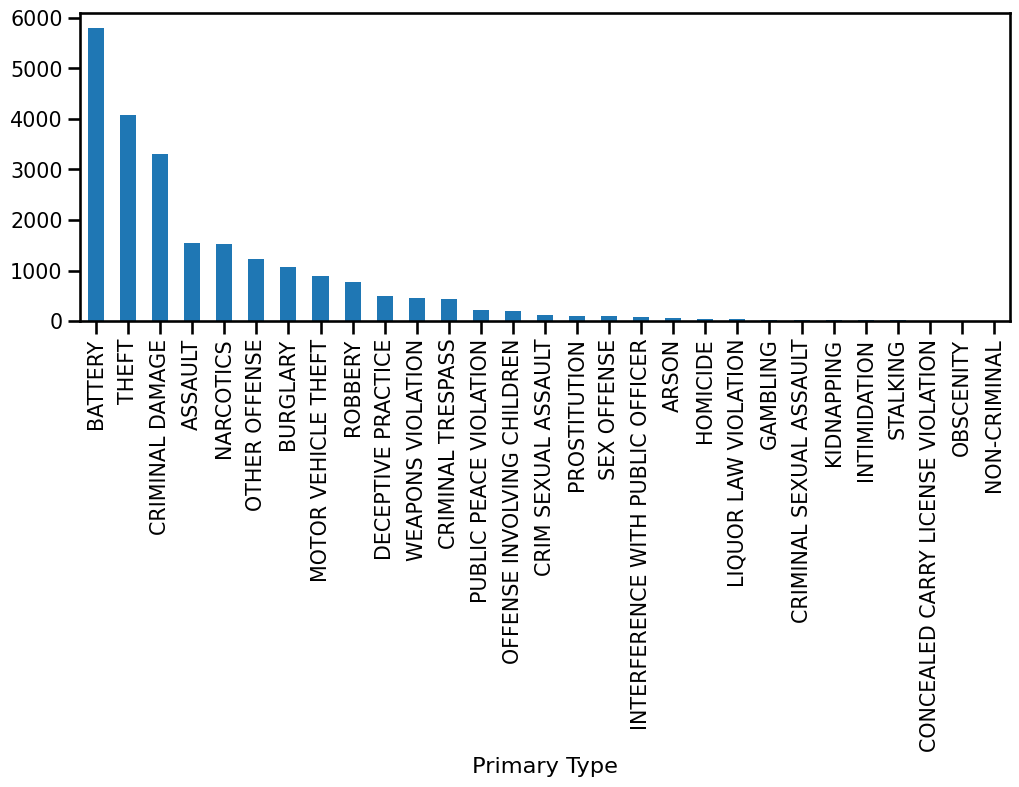

In [62]:
df_combined_holidays.loc[pd.IndexSlice['Independence Day', :]].groupby('Primary Type').sum().sort_values(ascending=False).plot(kind='bar');

In [63]:
top_5_labor_day = df_combined_holidays.loc[pd.IndexSlice['Labor Day', :]].groupby('Primary Type').sum().sort_values(ascending=False).head(5)
display(top_5_labor_day)

Primary Type
BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
NARCOTICS          2078
ASSAULT            1525
Name: #OfCrimes, dtype: int64

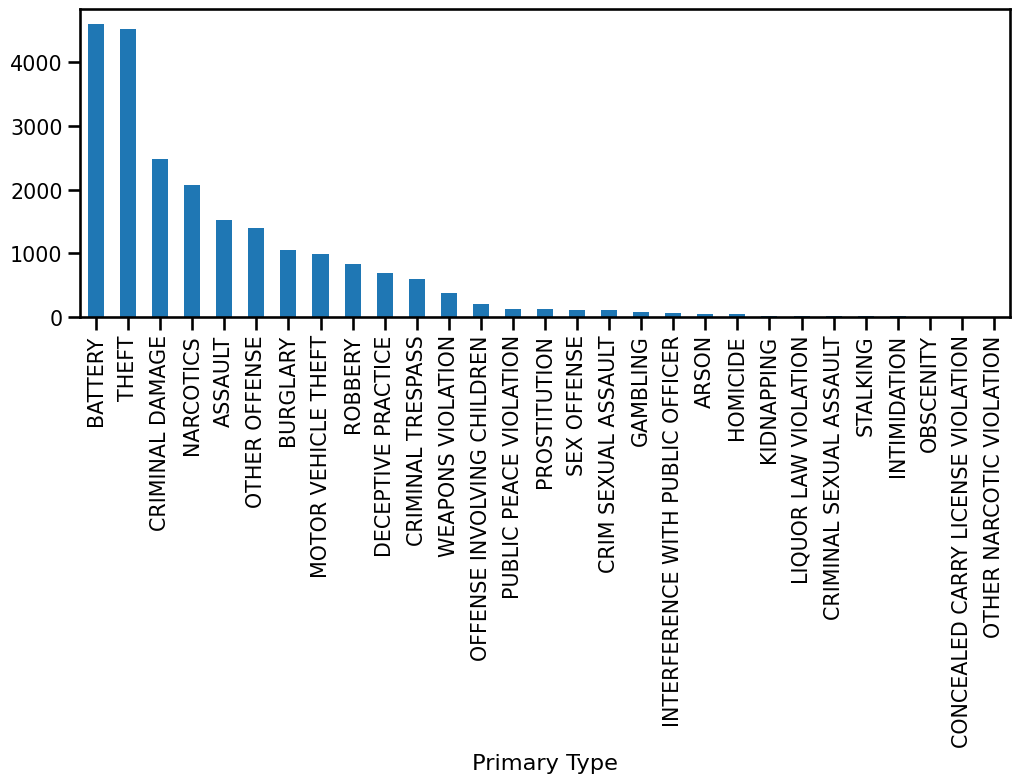

In [64]:
df_combined_holidays.loc[pd.IndexSlice['Labor Day', :]].groupby('Primary Type').sum().sort_values(ascending=False).plot(kind='bar');

- For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?
   - In New year`s day , the top 5 crimes were with counts:
       - THEFT	6845
       - BATTERY	6043
       - CRIMINAL DAMAGE	3236
       - DECEPTIVE PRACTICE	2934
       - OFFENSE INVOLVING CHILDREN	2380
    - In Independence day , the top 5 crimes were with counts:
       - BATTERY	5805
       - THEFT	4074
       - CRIMINAL DAMAGE	3309
       - ASSAULT	1547
       - NARCOTICS	1522
    - In Labor day , the top 5 crimes with counts:
        - BATTERY	4607
        - THEFT	4520
        - CRIMINAL DAMAGE	2475
        - NARCOTICS	2078
        - ASSAULT	1525



## Topic 6) What cycles (seasonality) can you find in this data?


- I will check if theft (monthly) has a sesonality or not

In [65]:
df_combined_theft = df_combined[df_combined['Primary Type'] == 'THEFT']
df_combined_theft

ID                Date Primary Type  \
Date                                                             
2001-01-01 01:00:00   1310586 2001-01-01 01:00:00        THEFT   
2001-01-01 01:00:00   1315458 2001-01-01 01:00:00        THEFT   
2001-01-01 13:00:00   6808288 2001-01-01 13:00:00        THEFT   
2001-01-01 13:00:00   3769790 2001-01-01 13:00:00        THEFT   
2001-01-01 13:00:00   1316324 2001-01-01 13:00:00        THEFT   
...                       ...                 ...          ...   
2022-12-31 12:22:00  12939870 2022-12-31 12:22:00        THEFT   
2022-12-31 00:24:00  12937499 2022-12-31 00:24:00        THEFT   
2022-12-31 12:30:00  12937845 2022-12-31 12:30:00        THEFT   
2022-12-31 00:30:00  12938015 2022-12-31 00:30:00        THEFT   
2022-12-31 00:30:00  12937442 2022-12-31 00:30:00        THEFT   

                                       Description  \
Date                                                 
2001-01-01 01:00:00                 $500 AND UNDER   
2001-01-01 01:00:00                 $500 AND UNDER   
2001-01-01 13:00:00  FINANCIAL ID THEFT: OVER $300   
2001-01-01 13:00:00        AGG: FINANCIAL ID THEFT   
2001-01-01 13:00:00                      OVER $500   
...                                            ...   
2022-12-31 12:22:00                 $500 AND UNDER   
2022-12-31 00:24:00                 $500 AND UNDER   
2022-12-31 12:30:00                 $500 AND UNDER   
2022-12-31 00:30:00                  FROM BUILDING   
2022-12-31 00:30:00                   RETAIL THEFT   

                            Location Description  Arrest  Domestic  Beat  \
Date                                                                       
2001-01-01 01:00:00                       STREET   False     False   911   
2001-01-01 01:00:00                       STREET   False     False  1421   
2001-01-01 13:00:00                    APARTMENT   False     False   213   
2001-01-01 13:00:00                    RESIDENCE   False     False   523   
2001-01-01 13:00:00                       STREET   False     False  1513   
...                                          ...     ...       ...   ...   
2022-12-31 12:22:00  RESIDENCE - PORCH / HALLWAY   False     False   733   
2022-12-31 00:24:00                       STREET   False     False  1131   
2022-12-31 12:30:00                    RESIDENCE   False     False   825   
2022-12-31 00:30:00                   RESTAURANT   False     False  1831   
2022-12-31 00:30:00           SMALL RETAIL STORE   False     False   123   

                     District  Ward   Latitude  Longitude  Hour Rush Hour  \
Date                                                                        
2001-01-01 01:00:00       9.0   NaN  41.798298 -87.692856     1     Other   
2001-01-01 01:00:00      14.0   NaN  41.910320 -87.702020     1     Other   
2001-01-01 13:00:00       2.0   3.0  41.822551 -87.615632    13     Other   
2001-01-01 13:00:00       5.0  34.0  41.673171 -87.638000    13     Other   
2001-01-01 13:00:00      15.0   NaN  41.869008 -87.773947    13     Other   
...                       ...   ...        ...        ...   ...       ...   
2022-12-31 12:22:00       7.0   6.0        NaN        NaN    12     Other   
2022-12-31 00:24:00      11.0  24.0  41.870494 -87.741860     0     Other   
2022-12-31 12:30:00       8.0  16.0  41.780222 -87.693428    12     Other   
2022-12-31 00:30:00      18.0  42.0  41.890014 -87.631665     0     Other   
2022-12-31 00:30:00       1.0   4.0  41.871489 -87.627517     0     Other   

                           Holidays  
Date                                 
2001-01-01 01:00:00  New Year's Day  
2001-01-01 01:00:00  New Year's Day  
2001-01-01 13:00:00  New Year's Day  
2001-01-01 13:00:00  New Year's Day  
2001-01-01 13:00:00  New Year's Day  
...                             ...  
2022-12-31 12:22:00            None  
2022-12-31 00:24:00            None  
2022-12-31 12:30:00            None  
2022-12-31 00:30:00            None  
2022-12-31 00:30:0

In [66]:
# resample to monthly
df_combined_theft_monthly = df_combined_theft.resample('MS').size()
df_combined_theft_monthy = df_combined_theft_monthly.rename('#OfCrimes')
display(df_combined_theft_monthly)

Date
2001-01-01    7867
2001-02-01    6669
2001-03-01    7766
2001-04-01    7702
2001-05-01    8420
              ... 
2022-08-01    5244
2022-09-01    5117
2022-10-01    5242
2022-11-01    4717
2022-12-01    4413
Freq: MS, Length: 264, dtype: int64

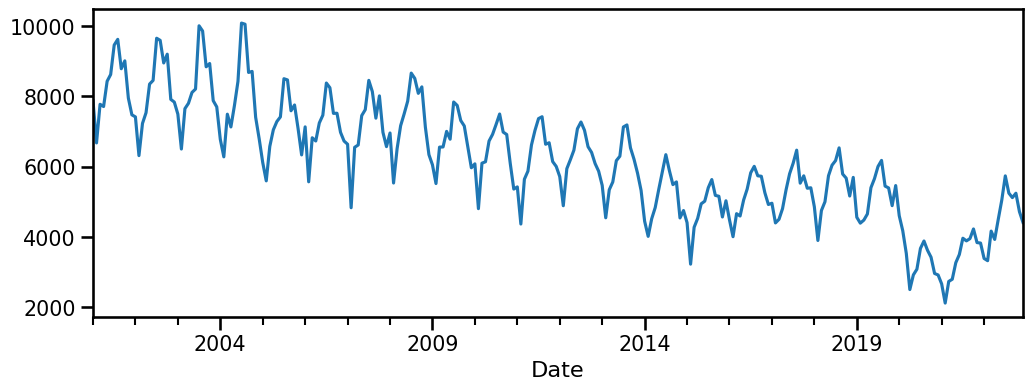

In [67]:
#plot it
df_combined_theft_monthly.plot();

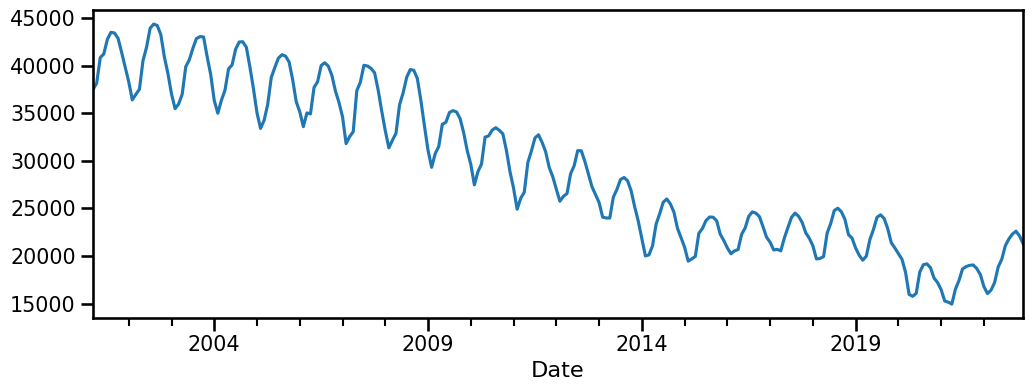

In [68]:
# smoothe it using rolling
df_combined_theft_monthly_smoothed = df_combined_monthly.rolling(window=3).mean().dropna()
df_combined_theft_monthly_smoothed.plot();

In [69]:
# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from '/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/api.py'>

In [70]:
decomp = tsa.seasonal_decompose(df_combined_theft_monthly_smoothed)
decomp

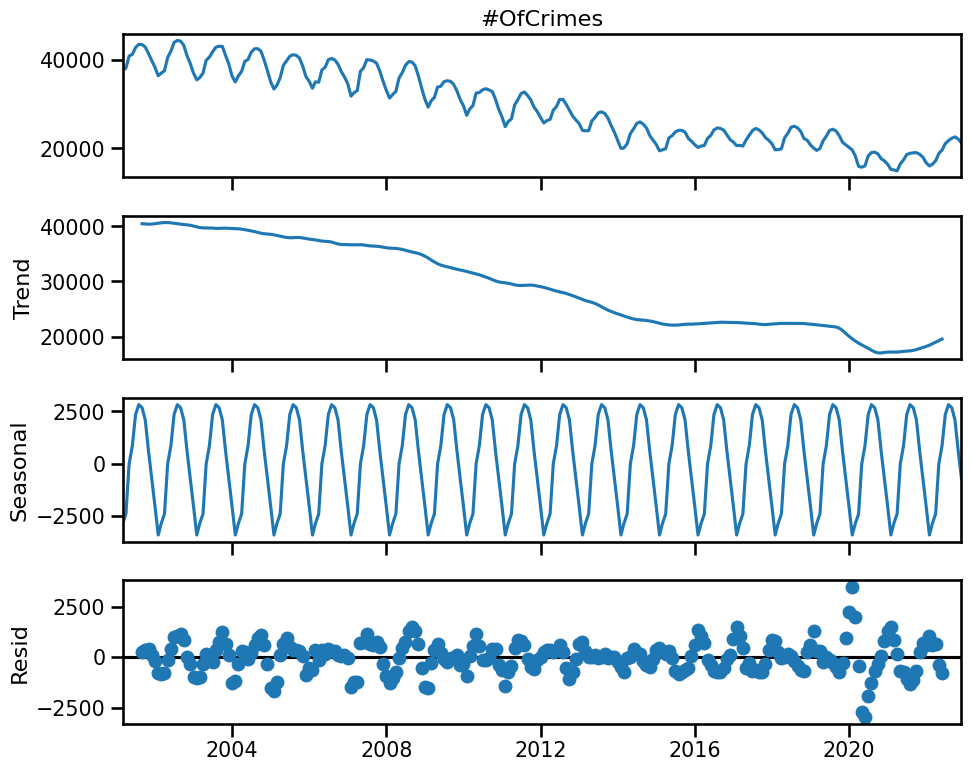

In [71]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [72]:
seasonal = decomp.seasonal
seasonal

Date
2001-03-01   -2863.307457
2001-04-01   -2400.763806
2001-05-01     -12.940394
2001-06-01     869.516617
2001-07-01    2350.787252
                 ...     
2022-08-01    2823.885863
2022-09-01    2675.086062
2022-10-01    2093.858548
2022-11-01     592.289765
2022-12-01    -686.818700
Freq: MS, Name: seasonal, Length: 262, dtype: float64

In [73]:
magnitude= seasonal.max() - seasonal.min()
magnitude
print(f"The seasonal component is {magnitude} which is ~{magnitude/(df_combined_theft_monthly.max()-df_combined_theft_monthly.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 6236.390410052909 which is ~78.46% of the variation in time series.


- seasonal of fluctuation 6236 theft crimes per month

In [74]:
# duration of seasonal
display(seasonal.idxmax())
display(seasonal.idxmin())
display(seasonal.idxmax() - seasonal.idxmin())

Timestamp('2001-08-01 00:00:00')

Timestamp('2002-02-01 00:00:00')

Timedelta('-184 days +00:00:00')

In [75]:
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator(3)
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title='Seasonal Component for Theft');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

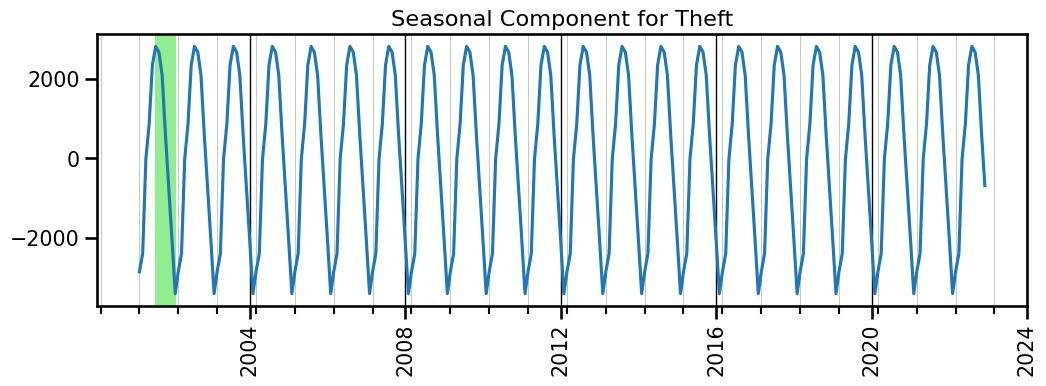

In [76]:
fig, ax = plot_seasonal(seasonal)
ax.axvspan(seasonal.idxmin(),seasonal.idxmax(), color='lightgreen');

In [77]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [78]:
peaks

array([  5,  17,  29,  41,  53,  65,  77,  89, 101, 113, 125, 137, 149,
       161, 173, 185, 197, 209, 221, 233, 245, 257])

In [79]:
props

{'peak_heights': array([2823.8858631, 2823.8858631, 2823.8858631, 2823.8858631,
        2823.8858631, 2823.8858631, 2823.8858631, 2823.8858631,
        2823.8858631, 2823.8858631, 2823.8858631, 2823.8858631,
        2823.8858631, 2823.8858631, 2823.8858631, 2823.8858631,
        2823.8858631, 2823.8858631, 2823.8858631, 2823.8858631,
        2823.8858631, 2823.8858631])}

In [80]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2001-08-01', '2002-08-01', '2003-08-01', '2004-08-01',
               '2005-08-01', '2006-08-01', '2007-08-01', '2008-08-01',
               '2009-08-01', '2010-08-01', '2011-08-01', '2012-08-01',
               '2013-08-01', '2014-08-01', '2015-08-01', '2016-08-01',
               '2017-08-01', '2018-08-01', '2019-08-01', '2020-08-01',
               '2021-08-01', '2022-08-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

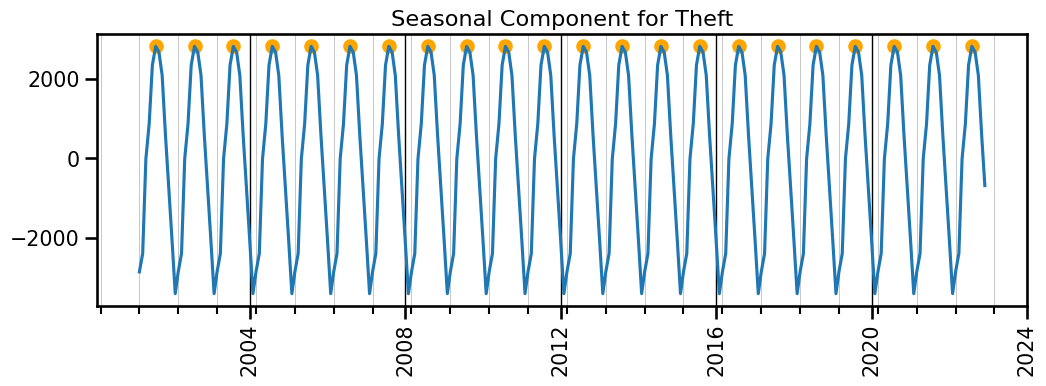

In [81]:
fig,ax = plot_seasonal(seasonal)
ax.scatter(peak_dates, props['peak_heights'], color='orange');

In [82]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('365 days 00:00:00')

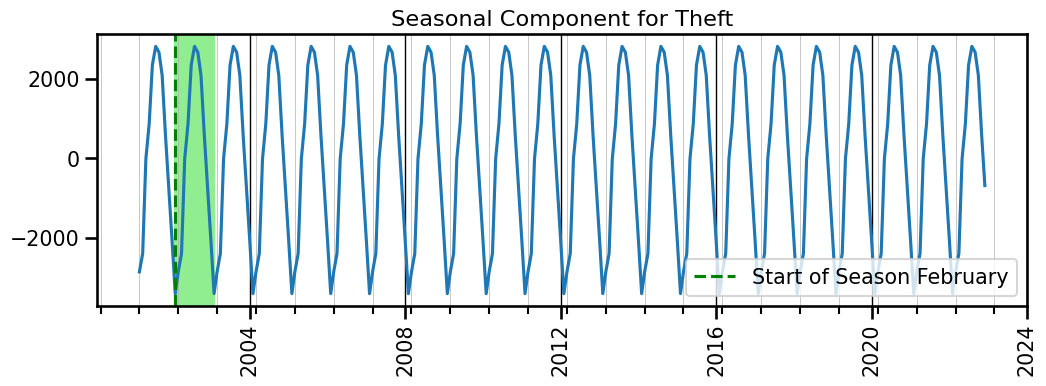

In [83]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

##Making forecasts for theft crime:

In [84]:
# !pip install --upgrade --force-reinstall \
#     numpy==1.26.4 \
#     pandas==2.2.2 \
#     pmdarima \
#     statsmodels \
#     opencv-python==4.10.0.84 \
#     opencv-contrib-python==4.10.0.84 \
#     opencv-python-headless==4.10.0.84 -q

In [85]:
import numpy, pandas, cv2, pmdarima, statsmodels, tensorflow as tf
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("cv2:", cv2.__version__)
print("pmdarima:", pmdarima.__version__)
print("statsmodels:", statsmodels.__version__)
print("tensorflow:", tf.__version__)

numpy: 1.26.4
pandas: 2.2.2
cv2: 4.10.0
pmdarima: 2.0.4
statsmodels: 0.14.5
tensorflow: 2.19.0


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.arima.utils import ndiffs , nsdiffs
from pmdarima.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Custom function:

In [87]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)
    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)
    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")
    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)
    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error , root_mean_squared_error
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse =root_mean_squared_error(ts_true, ts_pred)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100
    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")
    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [89]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       "keyword operator from-rainbow">="keyword operator from-rainbow">="string from-rainbow">'# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [90]:
def get_sig_lags(ts, type='ACF',  nlags=None,alpha=0.5):


    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags

In [91]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)




    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig

# Theft Crime Forecasting:

##Explore data

In [161]:
df_combined_theft_monthly

Date
2001-01-01    7867
2001-02-01    6669
2001-03-01    7766
2001-04-01    7702
2001-05-01    8420
              ... 
2022-08-01    5244
2022-09-01    5117
2022-10-01    5242
2022-11-01    4717
2022-12-01    4413
Freq: MS, Length: 264, dtype: int64

In [162]:
# check for null values
df_combined_theft_monthly.isnull().sum()

0

In [163]:
#Decompose the Time series to detect seasonality and decide whether to use a seasonal model or not
#I decomposed it and it is seasonal (look at the previous section)
print(f"The seasonal component is {magnitude} which is ~{magnitude/(df_combined_theft_monthly.max()-df_combined_theft_monthly.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 6236.390410052909 which is ~78.46% of the variation in time series.


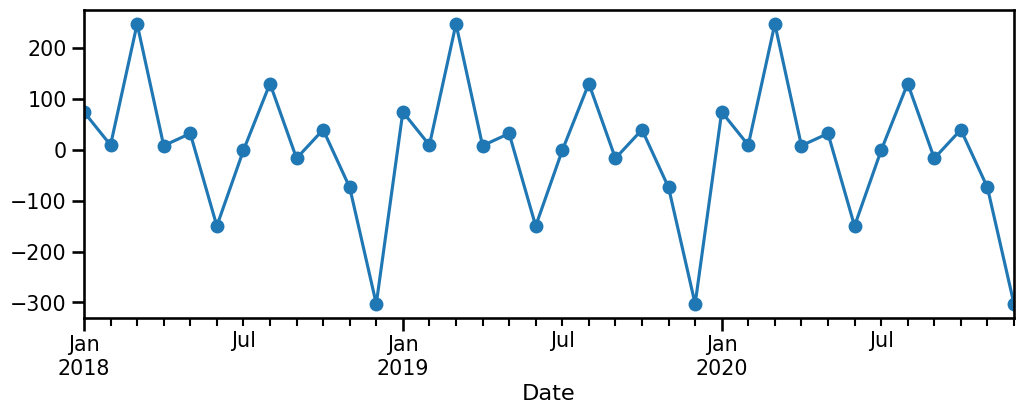

In [164]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.loc['2018': '2020'].plot(marker = 'o')

-  There are 12 points between peaks ,indicating a seasonal period of 12 months

In [165]:
# check stationary
get_adfuller_results(df_combined_theft_monthly)

Test Statistic  # of Lags Used  False  p-value  alpha  \
adfuller       -1.393935              13    250  0.58518   0.05   

          sig/stationary?  
adfuller            False

In [166]:
#Determine if nonseasonal and/or seasonal differencing is required
d= ndiffs(df_combined_theft_monthly)
sd= nsdiffs(df_combined_theft_monthly, m=12)
print(f"Nonseasonal differencing: {d}")
print(f"Seasonal differencing: {sd}")

Nonseasonal differencing: 1
Seasonal differencing: 0


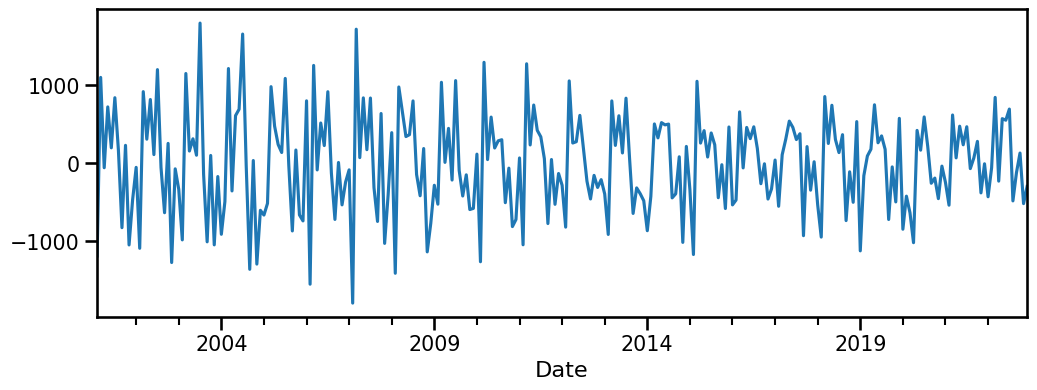

In [167]:
#Apply diff
df_combined_theft_monthly_diff = df_combined_theft_monthly.diff().dropna()
df_combined_theft_monthly_diff.plot();

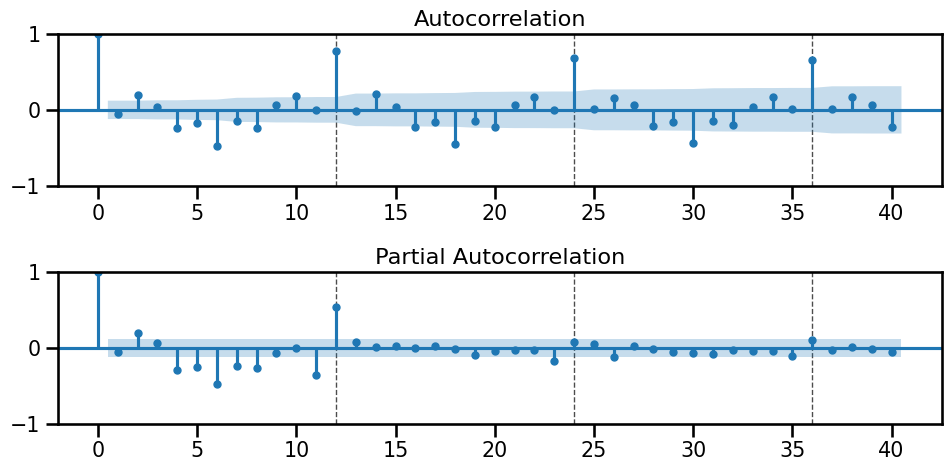

In [168]:
#Use the ACF and PACF plots of stationarity data to estimate initial orders
plot_acf_pacf(df_combined_theft_monthly_diff,annotate_seas=True, m=12);

- There is no dramatic drop in ACF or PACF . I will start with order(1,1,1)(1,0,1)[12]

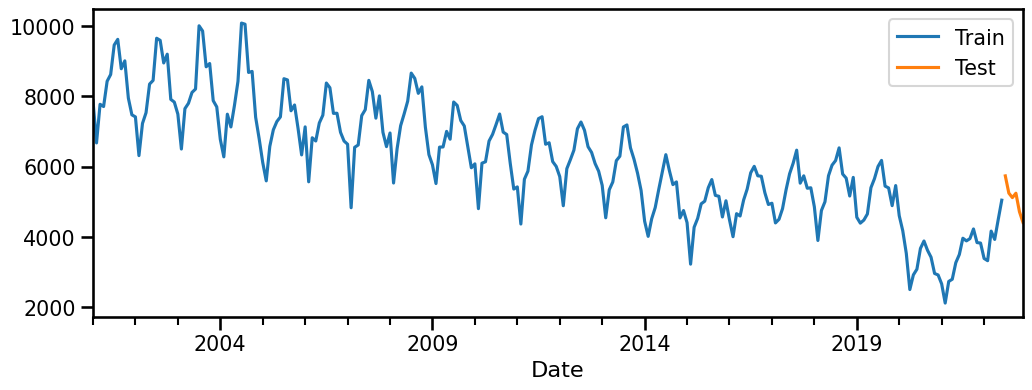

In [169]:
#Split the time series into training and test data
test_n_lags = 6
train , test = train_test_split(df_combined_theft_monthly, test_size= test_n_lags)
#plot
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

##First model

In [170]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA
# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period
sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1874.315
Date:                          Thu, 04 Sep 2025   AIC                           3758.631
Time:                                  15:04:35   BIC                           3776.376
Sample:                              01-01-2001   HQIC                          3765.767
                                   - 06-01-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9989      1.584      0.631      0.528      -2.105       4.103
ma.L1         -0.9989      1.532     -0.652      0.514      -4.002       2.004
ar.S.L12       0.9710      0.009    111.409      0.000       0.954       0.988
ma.S.L12      -0.6637      0.044    -15.002      0.000      -0.750      -0.577
sigma2      1.111e+05   8533.175     13.018      0.000    9.44e+04    1.28e+05
===================================================================================
Ljung-Box (L1) (Q):                  11.00   Jarque-Bera (JB):                12.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- ar.L1 and ma.L1 are insignificant.

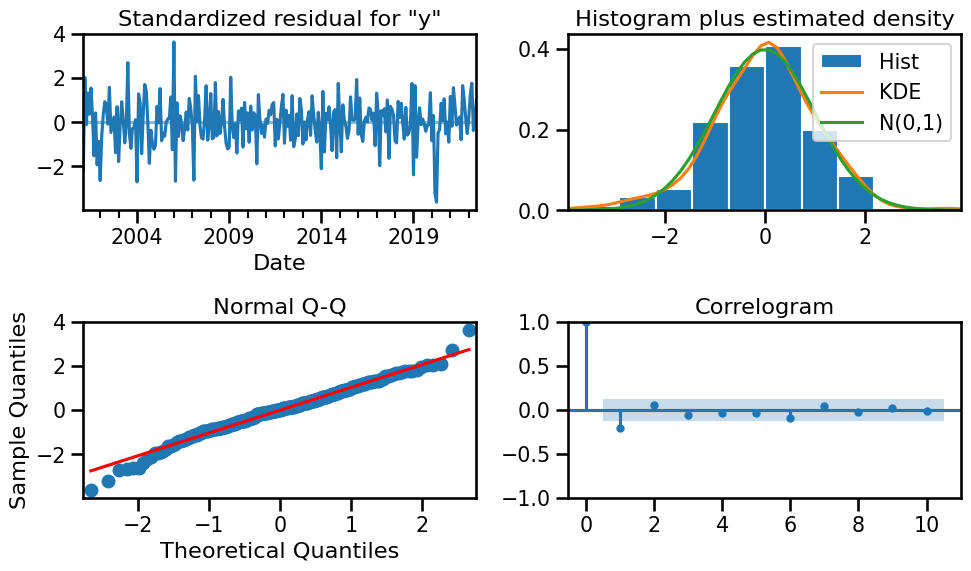

In [171]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- There is a significant value at lag1

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 237.046
- MSE = 84,001.447
- RMSE = 289.830
- R^2 = 0.524
- MAPE = 4.82%


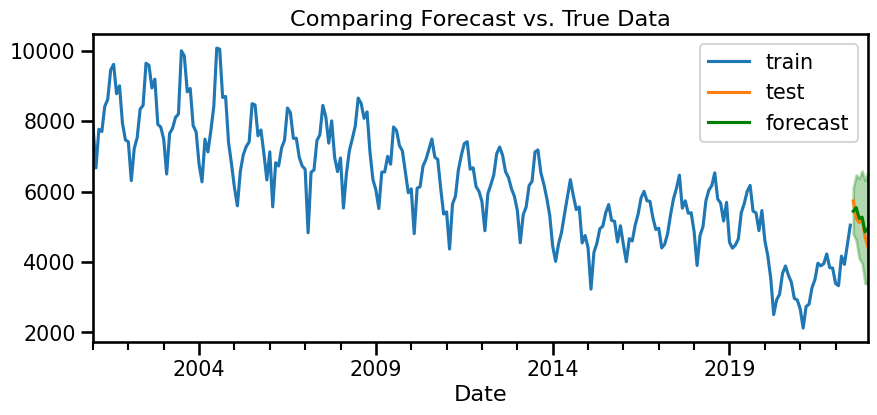

In [172]:
# forcast
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [173]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(train, seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=1.11 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3743.851, Time=8.61 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=1.93 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.68 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.899, Time=2.75 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=3.42 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=1.51 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=2.33 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

##Second model

In [174]:
sarima_auto = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()
# Obtain summary
sarima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                     y   No. Observations:                  258
Model:             ARIMA(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.632
Date:                               Thu, 04 Sep 2025   AIC                           3741.264
Time:                                       15:06:09   BIC                           3759.009
Sample:                                   01-01-2001   HQIC                          3748.400
                                        - 06-01-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2299      0.046     -5.014      0.000      -0.320      -0.140
ar.S.L12       0.9784      0.008    123.410      0.000       0.963       0.994
ma.S.L12      -0.5722      0.058     -9.828      0.000      -0.686      -0.458
ma.S.L24      -0.1250      0.068     -1.844      0.065      -0.258       0.008
sigma2      1.036e+05   7329.557     14.132      0.000    8.92e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                32.78
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.44
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

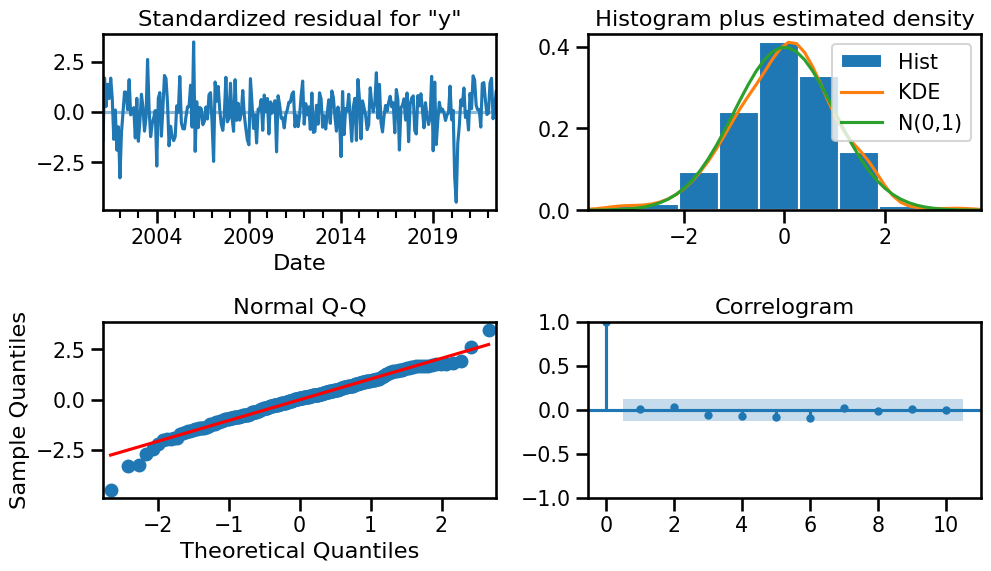

In [175]:
# Obtain diagnostic plots
fig = sarima_auto.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 198.257
- MSE = 68,421.193
- RMSE = 261.574
- R^2 = 0.612
- MAPE = 4.01%


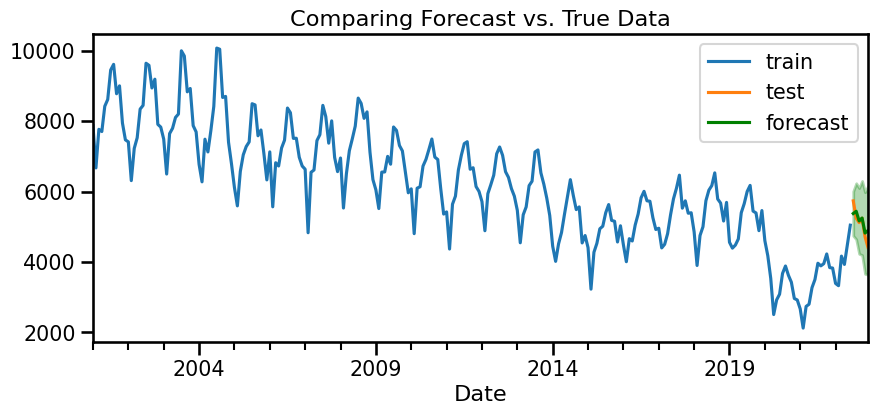

In [176]:
#forcast
forecast_df = sarima_auto.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

##Using second model to forecast using the entire data

In [177]:
sarima_auto = tsa.ARIMA(df_combined_theft_monthly, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()
# Obtain summary
sarima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                     y   No. Observations:                  264
Model:             ARIMA(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1908.282
Date:                               Thu, 04 Sep 2025   AIC                           3826.564
Time:                                       15:06:13   BIC                           3844.425
Sample:                                   01-01-2001   HQIC                          3833.742
                                        - 12-01-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2331      0.045     -5.140      0.000      -0.322      -0.144
ar.S.L12       0.9796      0.008    129.693      0.000       0.965       0.994
ma.S.L12      -0.5683      0.057     -9.906      0.000      -0.681      -0.456
ma.S.L24      -0.1367      0.067     -2.039      0.041      -0.268      -0.005
sigma2      1.031e+05   7248.032     14.218      0.000    8.88e+04    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                32.14
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.43
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

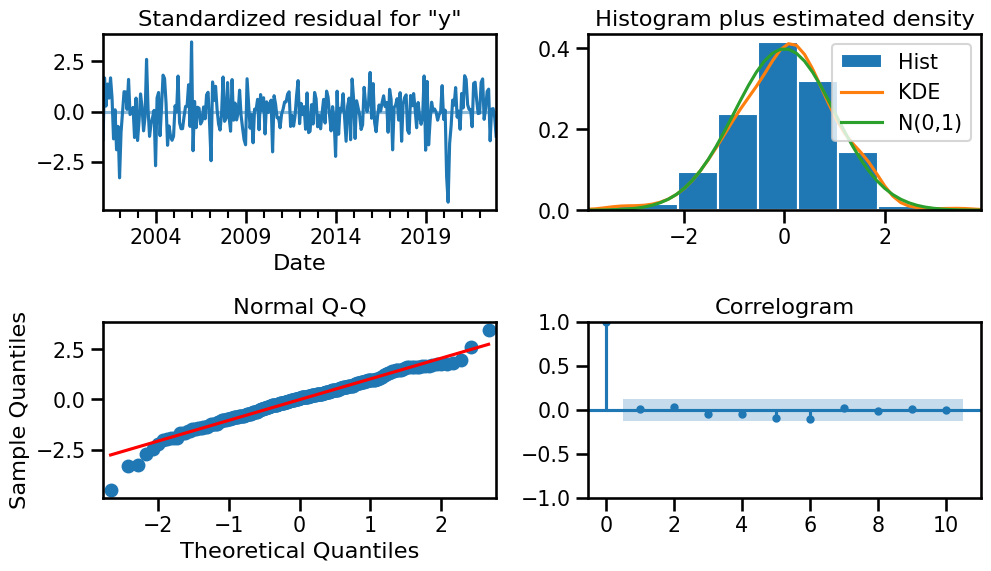

In [178]:
# Obtain diagnostic plots
fig = sarima_auto.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- There is a significant value at lag 6 in correlogram.

In [179]:
# predict to the next 6 months
forcast= sarima_auto.get_forecast(steps=6)
predicted_values = forcast.predicted_mean
predicted_in_c = forcast.conf_int()
print(predicted_values)
print(predicted_in_c)

2023-01-01    4037.795565
2023-02-01    3708.424261
2023-03-01    4219.691973
2023-04-01    4076.105508
2023-05-01    4589.175120
2023-06-01    4947.798788
Freq: MS, Name: predicted_mean, dtype: float64
                lower y      upper y
2023-01-01  3408.604401  4666.986729
2023-02-01  2915.518441  4501.330080
2023-03-01  3291.512164  5147.871781
2023-04-01  3030.000411  5122.210606
2023-05-01  3437.153422  5741.196818
2023-06-01  3698.810353  6196.787223


In [180]:
# concat into one dataframe
predicted_df = pd.concat([predicted_values, predicted_in_c], axis=1)
predicted_df

predicted_mean      lower y      upper y
2023-01-01     4037.795565  3408.604401  4666.986729
2023-02-01     3708.424261  2915.518441  4501.330080
2023-03-01     4219.691973  3291.512164  5147.871781
2023-04-01     4076.105508  3030.000411  5122.210606
2023-05-01     4589.175120  3437.153422  5741.196818
2023-06-01     4947.798788  3698.810353  6196.787223

- Calculate the predicted net change in the number (raw counts) of this type of crime from the beginning of the forecast to the end?

In [181]:
predicted_delta = predicted_df.iloc[-1] - predicted_df.iloc[0]
predicted_delta['predicted_mean']

910.0032231407686

- The last predicted value is 910 higher than the first predicted value.

 - Convert the raw delta into a percent change.


In [182]:
# convert it to percentage
predicted_delta_perc = predicted_delta/predicted_df.iloc[0]
predicted_delta_perc['predicted_mean']

0.22537129691436852

- Number of Theft crimes increased by 22% over the 6 months period.

# Narcotics Crime Forecasting

In [114]:
narcotics = df_combined_monthly_with_primary_type.loc['NARCOTICS']
narcotics

Date
2001-01-01    4714
2001-02-01    4369
2001-03-01    4862
2001-04-01    4044
2001-05-01    4038
              ... 
2022-08-01     420
2022-09-01     379
2022-10-01     358
2022-11-01     339
2022-12-01     325
Name: #OfCrimes, Length: 264, dtype: int64

In [115]:
#Check for and address null values.
narcotics.isnull().sum()

0

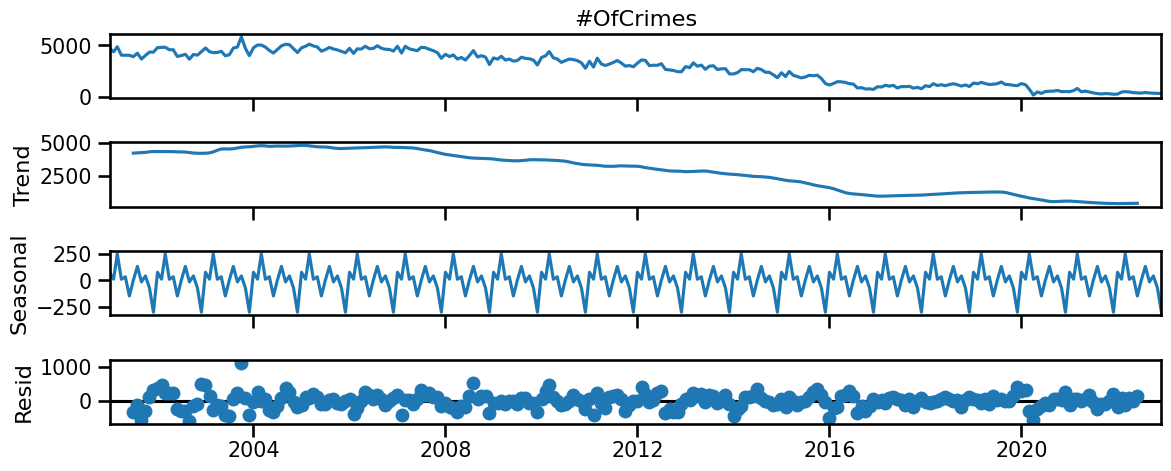

In [116]:
#Decompose the Time series to detect seasonality and decide whether to use a seasonal model or not
decomp = tsa.seasonal_decompose(narcotics)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [117]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(narcotics.max()-narcotics.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 550.6626984126985 which is ~9.76% of the variation in time series.


- It is small but I will start with simple order

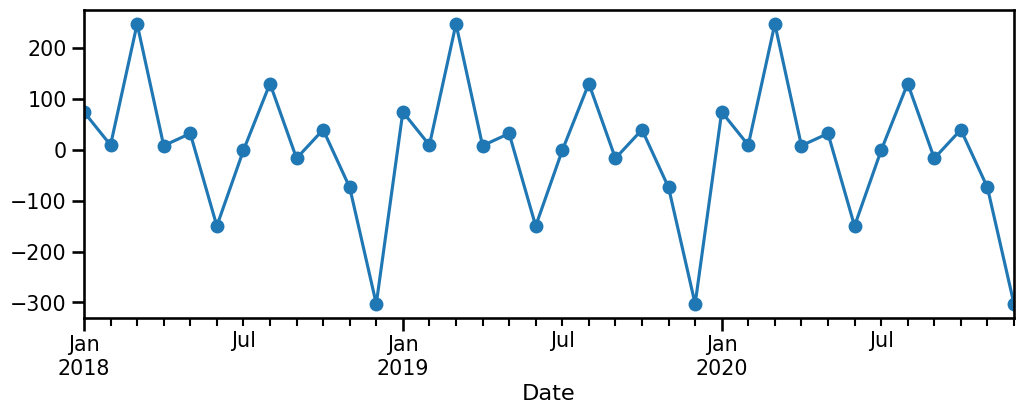

In [118]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.loc['2018': '2020'].plot(marker = 'o')

- from the plot , m=12 .

In [119]:
# check stationary
get_adfuller_results(narcotics)

Test Statistic  # of Lags Used  False   p-value  alpha  \
adfuller        0.265472              12    251  0.975704   0.05   

          sig/stationary?  
adfuller            False

In [120]:
# check how many diffs we need
d= ndiffs(narcotics)
sd= nsdiffs(narcotics, m=12)
print(f"Nonseasonal differencing: {d}")
print(f"Seasonal differencing: {sd}")

Nonseasonal differencing: 1
Seasonal differencing: 0


Test Statistic  # of Lags Used  False   p-value  alpha  \
adfuller       -5.393766              11    251  0.000003   0.05   

          sig/stationary?  
adfuller             True

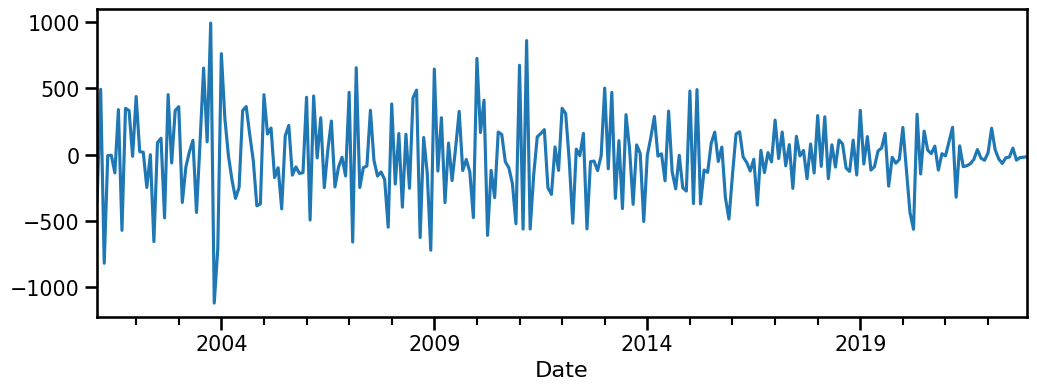

In [121]:
#Apply one diff
narcotics_diff = narcotics.diff().dropna()
narcotics_diff.plot();
get_adfuller_results(narcotics_diff)

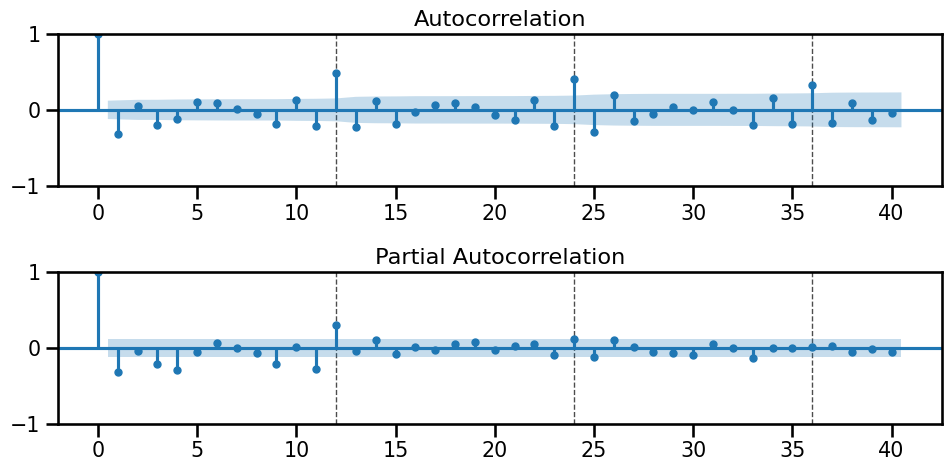

In [122]:
plot_acf_pacf(narcotics_diff,annotate_seas=True, m=12);

- There is no any dramatic drop , I will start with (1,1,1)(1,0,1)[12]

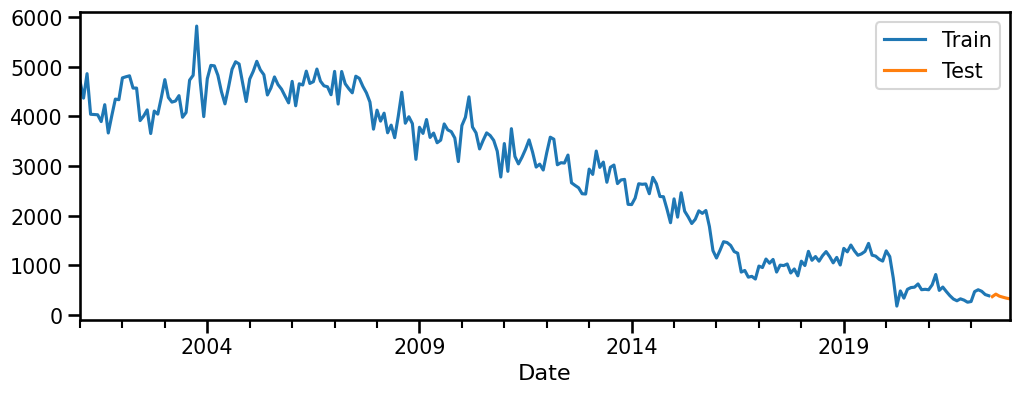

In [123]:
test_n_lags = 6
train, test= train_test_split(narcotics , test_size=test_n_lags)
#plot
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

##First model

In [124]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA
# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period
sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        #OfCrimes   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1765.407
Date:                          Thu, 04 Sep 2025   AIC                           3540.813
Time:                                  13:53:36   BIC                           3558.559
Sample:                              01-01-2001   HQIC                          3547.950
                                   - 06-01-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5604      0.085      6.623      0.000       0.395       0.726
ma.L1         -0.8372      0.066    -12.623      0.000      -0.967      -0.707
ar.S.L12       0.9474      0.027     34.957      0.000       0.894       1.001
ma.S.L12      -0.7342      0.076     -9.689      0.000      -0.883      -0.586
sigma2      5.302e+04   3494.247     15.175      0.000    4.62e+04    5.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                44.53
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

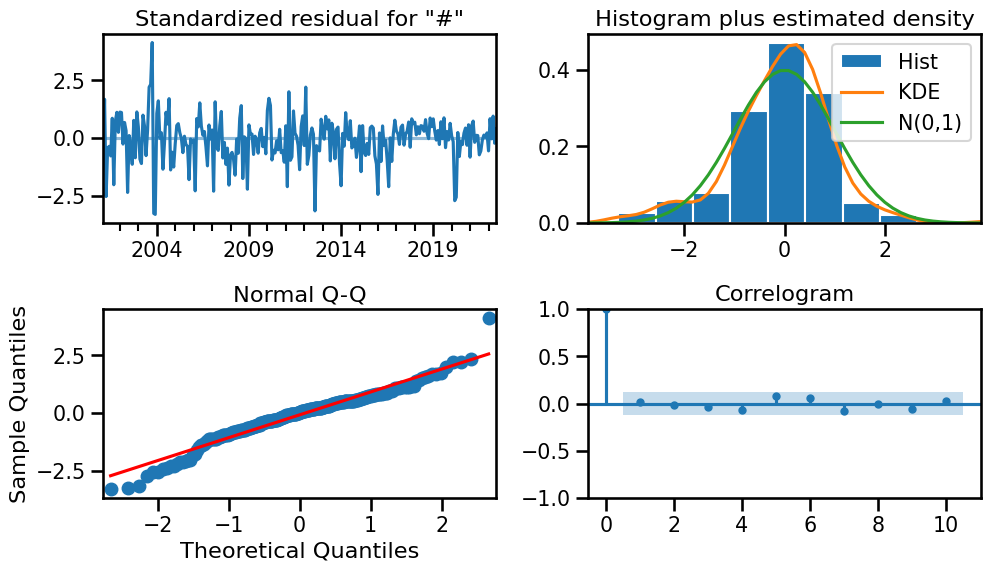

In [125]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 73.857
- MSE = 7,168.503
- RMSE = 84.667
- R^2 = -6.721
- MAPE = 21.14%


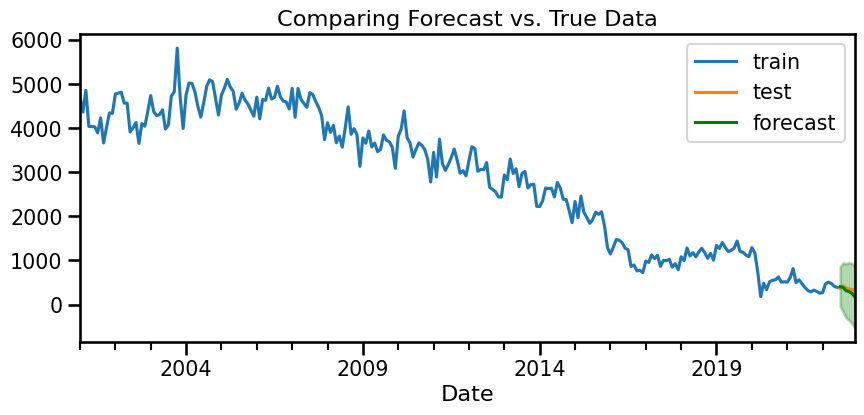

In [126]:
# forcast
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

- PMAE is too high!!

In [127]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(train, seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3669.016, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3583.957, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3595.909, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3667.813, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3643.189, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3577.354, Time=1.49 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3559.635, Time=2.52 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3559.679, Time=1.02 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.41 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3559.353, Time=4.98 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3589.825, Time=0.96 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3602.922, Time=0.33 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3566.678, Time=2.16 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

##Second model

In [128]:
sarima_auto = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()
# Obtain summary
sarima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          #OfCrimes   No. Observations:                  258
Model:             ARIMA(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1764.670
Date:                            Thu, 04 Sep 2025   AIC                           3543.341
Time:                                    13:55:45   BIC                           3568.184
Sample:                                01-01-2001   HQIC                          3553.332
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2524      0.042     -5.976      0.000      -0.335      -0.170
ar.L2         -0.1862      0.053     -3.528      0.000      -0.290      -0.083
ar.L3         -0.2032      0.058     -3.488      0.000      -0.317      -0.089
ar.L4         -0.1967      0.061     -3.247      0.001      -0.315      -0.078
ar.S.L12       0.9384      0.032     29.749      0.000       0.877       1.000
ma.S.L12      -0.7208      0.081     -8.953      0.000      -0.879      -0.563
sigma2      5.296e+04   3683.358     14.379      0.000    4.57e+04    6.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.52
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

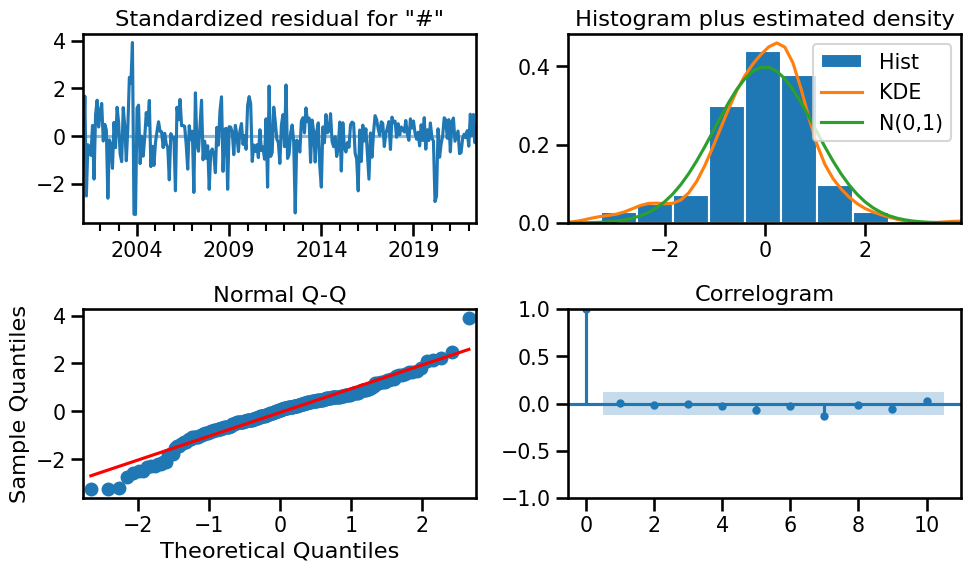

In [129]:
# Obtain diagnostic plots
fig = sarima_auto.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- There is a significant value at lag 7 in correlogram.

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 34.565
- MSE = 1,829.462
- RMSE = 42.772
- R^2 = -0.970
- MAPE = 9.88%


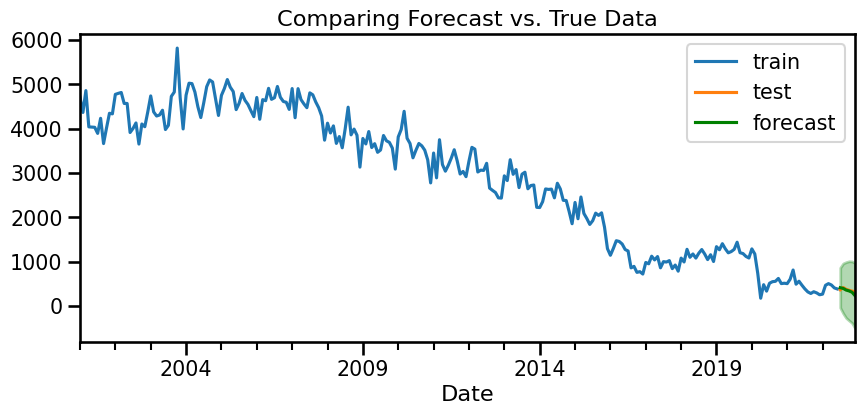

In [130]:
# forcast
forecast_df = sarima_auto.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

##Using second model to forecast the next 6 months:

In [135]:
sarima_auto = tsa.ARIMA(narcotics, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()
# Obtain summary
sarima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          #OfCrimes   No. Observations:                  264
Model:             ARIMA(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1802.886
Date:                            Thu, 04 Sep 2025   AIC                           3619.772
Time:                                    14:29:03   BIC                           3644.777
Sample:                                01-01-2001   HQIC                          3629.821
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2526      0.041     -6.123      0.000      -0.333      -0.172
ar.L2         -0.1865      0.052     -3.613      0.000      -0.288      -0.085
ar.L3         -0.2037      0.057     -3.573      0.000      -0.315      -0.092
ar.L4         -0.1962      0.059     -3.310      0.001      -0.312      -0.080
ar.S.L12       0.9371      0.031     30.032      0.000       0.876       0.998
ma.S.L12      -0.7169      0.079     -9.061      0.000      -0.872      -0.562
sigma2      5.181e+04   3511.892     14.751      0.000    4.49e+04    5.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                43.89
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

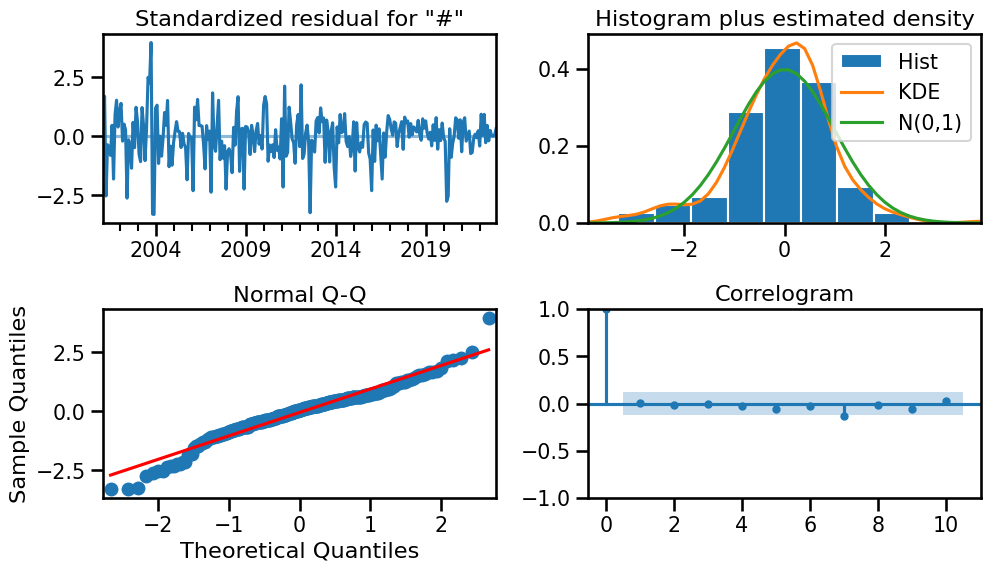

In [136]:
# Obtain diagnostic plots
fig = sarima_auto.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- There is a significant value at lag 7 in correlogram.

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 43.188
- MSE = 2,864.906
- RMSE = 53.525
- R^2 = -2.086
- MAPE = 11.84%


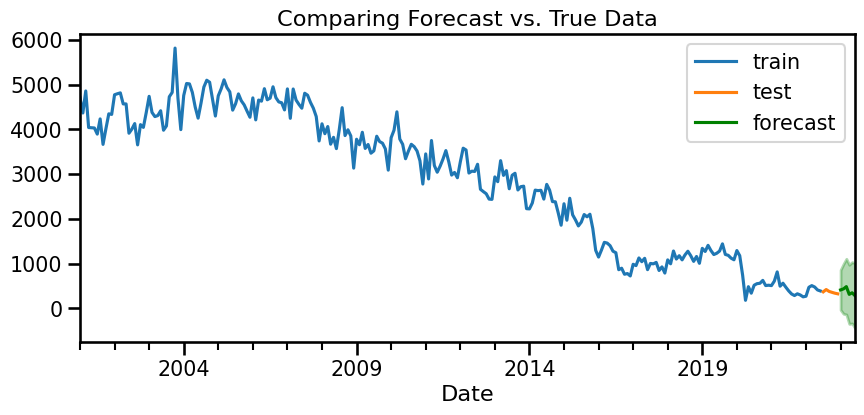

In [137]:
# forcast
forecast_df = sarima_auto.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [139]:
# predict to the next 6 months
forcast= sarima_auto.get_forecast(steps=6)
predicted_values = forcast.predicted_mean
predicted_in_c = forcast.conf_int()
print(predicted_values)
print(predicted_in_c)

2023-01-01    412.173559
2023-02-01    434.747472
2023-03-01    485.561423
2023-04-01    312.624319
2023-05-01    348.080873
2023-06-01    283.810317
Freq: MS, Name: predicted_mean, dtype: float64
            lower #OfCrimes  upper #OfCrimes
2023-01-01       -33.928395       858.275513
2023-02-01      -122.193935       991.688879
2023-03-01      -137.218808      1108.341654
2023-04-01      -348.768505       974.017142
2023-05-01      -338.013549      1034.175295
2023-06-01      -441.838961      1009.459595


In [147]:
# concat into one dataframe
predicted_df_narcotics = pd.concat([predicted_values, predicted_in_c], axis=1)
predicted_df_narcotics

predicted_mean  lower #OfCrimes  upper #OfCrimes
2023-01-01      412.173559       -33.928395       858.275513
2023-02-01      434.747472      -122.193935       991.688879
2023-03-01      485.561423      -137.218808      1108.341654
2023-04-01      312.624319      -348.768505       974.017142
2023-05-01      348.080873      -338.013549      1034.175295
2023-06-01      283.810317      -441.838961      1009.459595

- Calculate the predicted net change in the number (raw counts) of this type of crime from the beginning of the forecast to the end?

In [148]:
predicted_delta_narcotics = predicted_df_narcotics.iloc[-1] - predicted_df_narcotics.iloc[0]
predicted_delta_narcotics['predicted_mean']

-128.36324179226506

- The last predicted value is 128 lower than the first predicted value.

- Convert the raw delta into a percent change?

In [149]:
# convert it to percentage
predicted_delta_perc_narcotics = predicted_delta_narcotics/predicted_df_narcotics.iloc[0]
predicted_delta_perc_narcotics['predicted_mean']

-0.31143007355660984

- Number of narcotics crimes decreased by 31% over the 6 months period.

## Final evaluation:
- Which of the two crimes is forecasted to have the highest monthly count of crimes at the end of the forecast?
    - Theft
- Which of the two crimes is forecasted to have the highest net change by the end of the forecast?
     - Theft
- Which of the two crimes is forecasted to have the highest percent change by the end of the forecast?
    - Narcotics

#Final Recommendations
1- Recommendation for theft crime:
 - Increase police patrols in high-theft areas.
 - Strengthen community awareness campaigns (e.g., shop security, protecting personal belongings).
  - Invest in surveillance systems such as CCTV and improved street lighting.

2- Recommendations for Narcotics crime:
 - Maintain current enforcement strategies against narcotics.
 - Reallocate some resources toward addressing theft since it is rising.
- Continue preventive campaigns to avoid future spikes in narcotics cases.

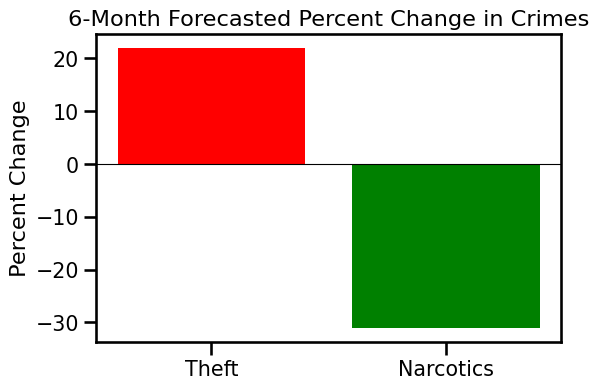

In [146]:
crimes = ['Theft', 'Narcotics']
percent_changes = [22, -31]
# Bar Chart
plt.figure(figsize=(6,4))
plt.bar(crimes, percent_changes, color=['red','green'])
# Formatting
plt.axhline(0, color='black', linewidth=0.8)
plt.title("6-Month Forecasted Percent Change in Crimes")
plt.ylabel("Percent Change")
plt.show()


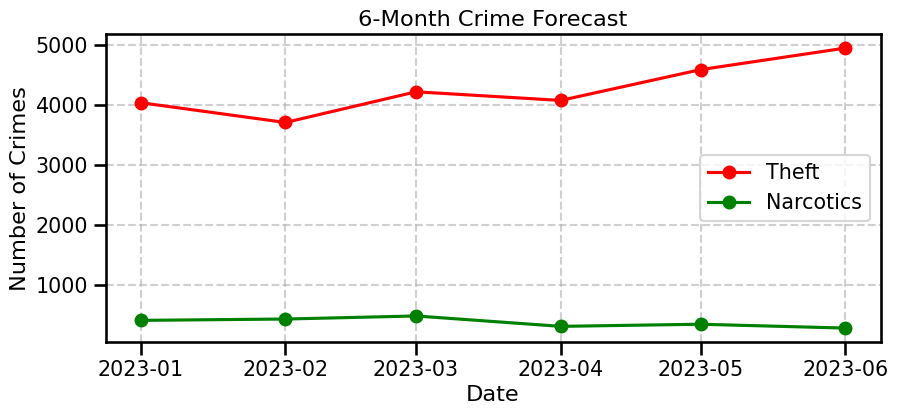

In [183]:
plt.figure(figsize=(10,4))
plt.plot(predicted_df['predicted_mean'], marker='o', color='red', label='Theft')
plt.plot(predicted_df_narcotics['predicted_mean'], marker='o', color='green', label='Narcotics')
plt.title("6-Month Crime Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
